# Context

Open source anonymous multinational bank customer churn dataset from Kaggle. 

# Objective

The bank want to know what leads client towards leaving the company. 

# Data description

- RowNumber: row number of data.
- CustomerId: customer unique ID.
- Surname: the surname of a customer.
- CreditScore: customer credit score.
- Geography: customer's location.
- Gender: customer's gender
- Age: customer's age
- Tenure: number of years that the customer has been a client of the bank.
- Balance: customer's account balance
- NumOfProducts: refers to the number of products that a customer has purchased through the bank.
- HasCrCard: denotes whether or not a customer has a credit card.
- IsActiveMember: active customers indicator.
- EstimatedSalary: customer's estimated salary.
- Exited: whether or not the customer left the bank.
- Complain: customer has complaint or not.
- Satisfaction Score: Score provided by the customer for their complaint resolution.
- Card Type: type of card hold by the customer.
- Points Earned: the points earned by the customer for using credit card.

# Required libraries and functions

## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np


import warnings
warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter("ignore", ConvergenceWarning)


# import libraries for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import collections


# To tune model, get different metric scores and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)


# To help with model building
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression


# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)    
# setting the precision of floating numbers to 2 decimal points
pd.set_option("display.float_format", lambda x: "%.2f" % x)

## Defining functions for the projects

### Plots

In [2]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [3]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [4]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [5]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Modelling

In [6]:
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [7]:
def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")


In [8]:
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

# Load data

In [9]:
data = pd.read_csv('Customer-Churn-Records.csv')
df = data.copy()

# Analysis

### Data overview

In [10]:
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure   Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2      0.00              1          1               1   
1       1  83807.86              1          0               1   
2       8 159660.80              3          1               0   
3       1      0.00              2          0               0   
4       2 125510.82              1          1               1   

   EstimatedSalary  Exited  Complain  Satisfaction Score Card Type  \
0        101348.88       1         1                   2   DIAMOND   
1        112542.58       0         1                   3   DIAMOND   
2        113931.57       1         1                   3   DIAMOND   
3         93826.63       0         0                   5      GOLD   
4         79084.10       0         0                   5      GOLD   

   Point Earned  
0           464  
1           456  
2           377  
3           350  
4           425

In [11]:
df['Surname'].value_counts()

Surname
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: count, Length: 2932, dtype: int64

In [12]:
df['CustomerId'].value_counts()

CustomerId
15634602    1
15667932    1
15766185    1
15667632    1
15599024    1
           ..
15599078    1
15702300    1
15660735    1
15671390    1
15628319    1
Name: count, Length: 10000, dtype: int64

In [13]:
df.describe()

RowNumber  CustomerId  CreditScore      Age   Tenure   Balance  \
count   10000.00    10000.00     10000.00 10000.00 10000.00  10000.00   
mean     5000.50 15690940.57       650.53    38.92     5.01  76485.89   
std      2886.90    71936.19        96.65    10.49     2.89  62397.41   
min         1.00 15565701.00       350.00    18.00     0.00      0.00   
25%      2500.75 15628528.25       584.00    32.00     3.00      0.00   
50%      5000.50 15690738.00       652.00    37.00     5.00  97198.54   
75%      7500.25 15753233.75       718.00    44.00     7.00 127644.24   
max     10000.00 15815690.00       850.00    92.00    10.00 250898.09   

       NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary   Exited  \
count       10000.00   10000.00        10000.00         10000.00 10000.00   
mean            1.53       0.71            0.52        100090.24     0.20   
std             0.58       0.46            0.50         57510.49     0.40   
min             1.00       0.00            0.00            11.58     0.00   
25%             1.00       0.00            0.00         51002.11     0.00   
50%             1.00       1.00            1.00        100193.91     0.00   
75%             2.00       1.00            1.00        149388.25     0.00   
max             4.00       1.00            1.00        199992.48     1.00   

       Complain  Satisfaction Score  Point Earned  
count  10000.00            10000.00      10000.00  
mean       0.20                3.01        606.52  
std        0.40                1.41        225.92  
min        0.00                1.00        119.00  
25%        0.00                2.00        410.00  
50%        0.00                3.00        605.00  
75%        0.00                4.00        801.00  
max        1.00                5.00       1000.00

In [14]:
df.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [15]:
df['Tenure'].value_counts()

Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64

In [16]:
df[df['Tenure'] == 0 ]

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
29           30    15656300  Lucciano          411    France    Male   29   
35           36    15794171  Lombardo          475    France  Female   45   
57           58    15647091  Endrizzi          725   Germany    Male   19   
72           73    15812518   Palermo          657     Spain  Female   37   
127         128    15782688    Piccio          625   Germany    Male   56   
...         ...         ...       ...          ...       ...     ...  ...   
9793       9794    15772363    Hilton          772   Germany  Female   42   
9799       9800    15722731     Manna          653    France    Male   46   
9843       9844    15778304       Fan          646   Germany    Male   24   
9868       9869    15587640  Rowntree          718    France  Female   43   
9919       9920    15798084    Murray          688    France    Male   26   

      Tenure   Balance  NumOfProducts  HasCrCard  IsActiveMember  \
29         0  59697.17              2          1               1   
35         0 134264.04              1          1               0   
57         0  75888.20              1          0               0   
72         0 163607.18              1          0               1   
127        0 148507.24              1          1               0   
...      ...       ...            ...        ...             ...   
9793       0 101979.16              1          1               0   
9799       0 119556.10              1          1               0   
9843       0  92398.08              1          1               1   
9868       0  93143.39              1          1               0   
9919       0      0.00              2          1               0   

      EstimatedSalary  Exited  Complain  Satisfaction Score Card Type  \
29           53483.21       0         0                   2      GOLD   
35           27822.99       1         1                   1   DIAMOND   
57           45613.75       0         0                   2  PLATINUM   
72           44203.55       0         0                   2      GOLD   
127          46824.08       1         1                   3  PLATINUM   
...               ...     ...       ...                 ...       ...   
9793         90928.48       0         0                   4      GOLD   
9799         78250.13       1         1                   2  PLATINUM   
9843         18897.29       0         0                   5      GOLD   
9868        167554.86       0         0                   3   DIAMOND   
9919        105784.85       0         0                   4  PLATINUM   

      Point Earned  
29             343  
35             877  
57             406  
72             979  
127            410  
...            ...  
9793           612  
9799           975  
9843           887  
9868           491  
9919           827  

[413 rows x 18 columns]

In [17]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

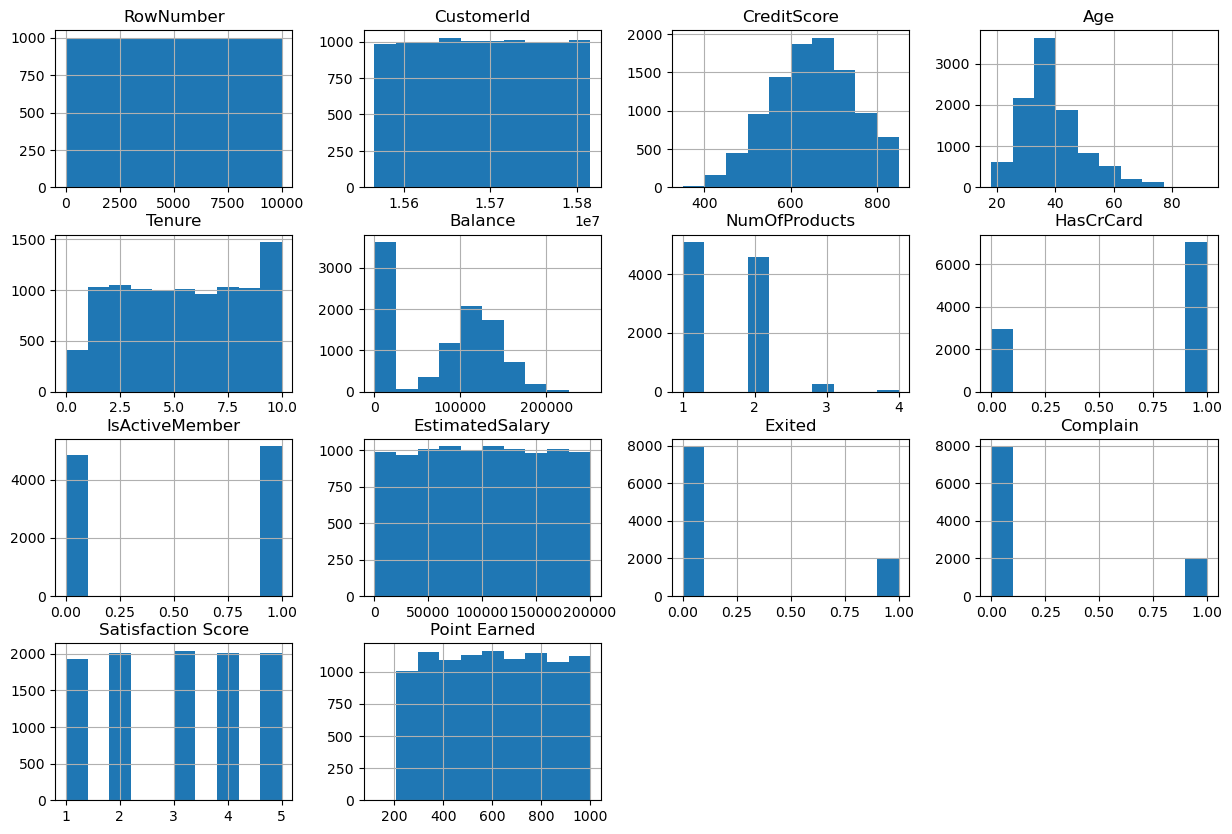

In [18]:
df.hist(figsize=(15,10))
plt.show()

In [19]:
cat_columns = df.describe(include=['object']).columns
cat_columns

for i in cat_columns:
    print("Unique values in", i, "are :")
    print(data[i].value_counts())
    print("-" * 50)

Unique values in Surname are :
Surname
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: count, Length: 2932, dtype: int64
--------------------------------------------------
Unique values in Geography are :
Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
--------------------------------------------------
Unique values in Gender are :
Gender
Male      5457
Female    4543
Name: count, dtype: int64
--------------------------------------------------
Unique values in Card Type are :
Card Type
DIAMOND     2507
GOLD        2502
SILVER      2496
PLATINUM    2495
Name: count, dtype: int64
--------------------------------------------------


### Exploratory Data Analysis

#### Univariate

In [20]:
num_columns = df.describe(include=np.number).columns
num_columns

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Complain', 'Satisfaction Score', 'Point Earned'],
      dtype='object')

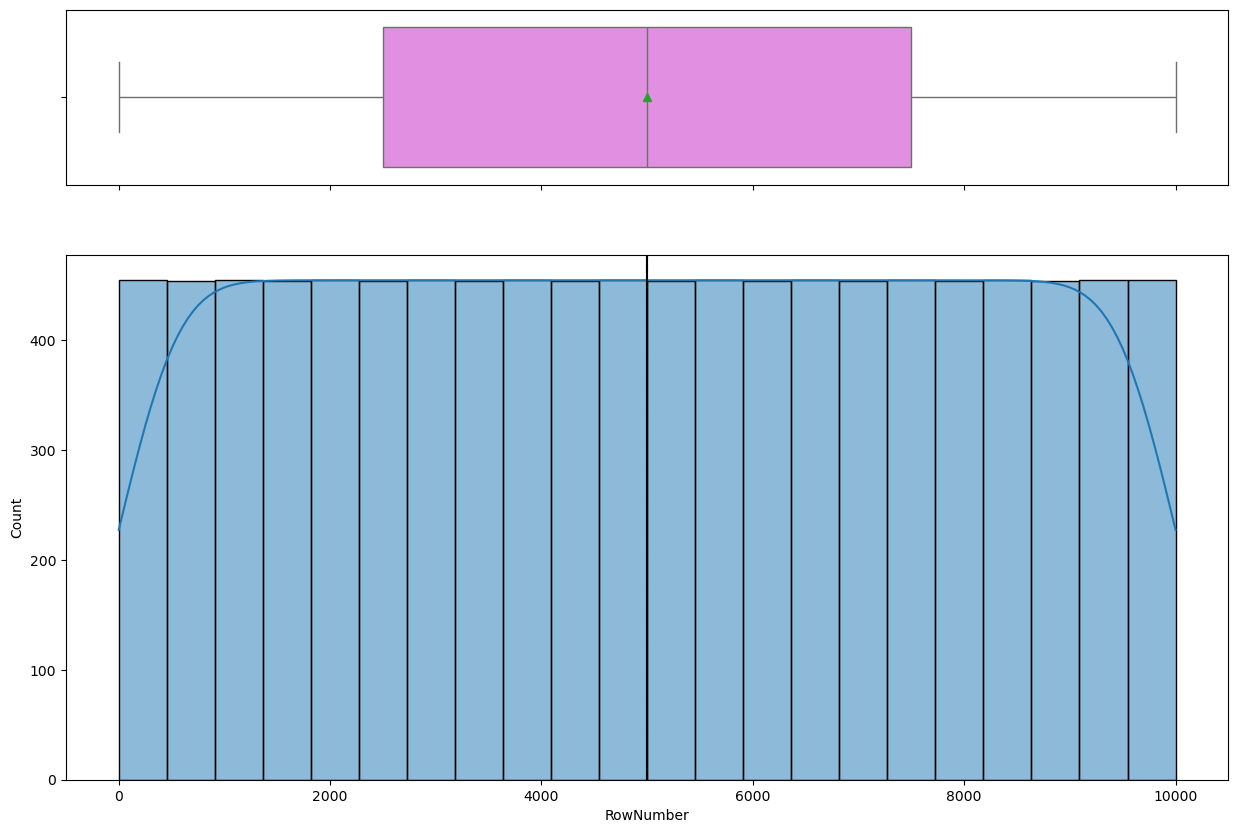

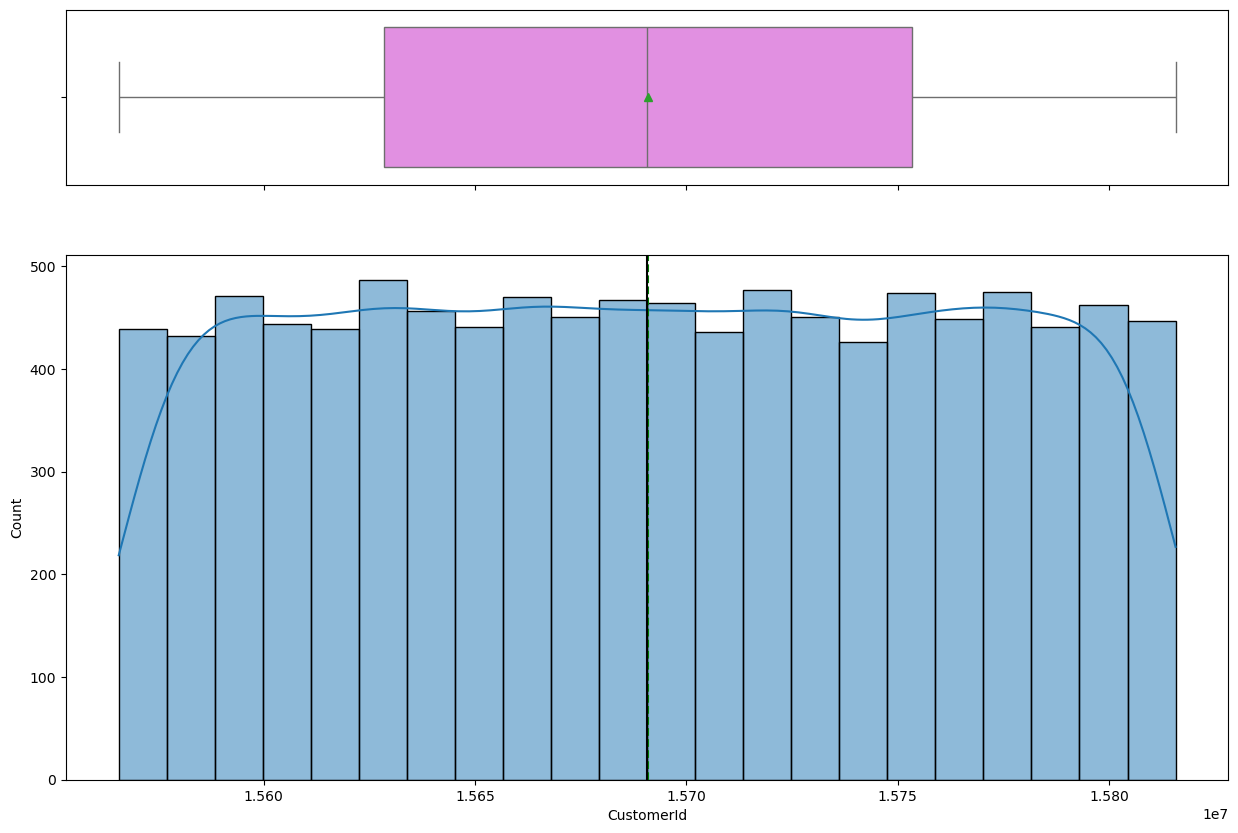

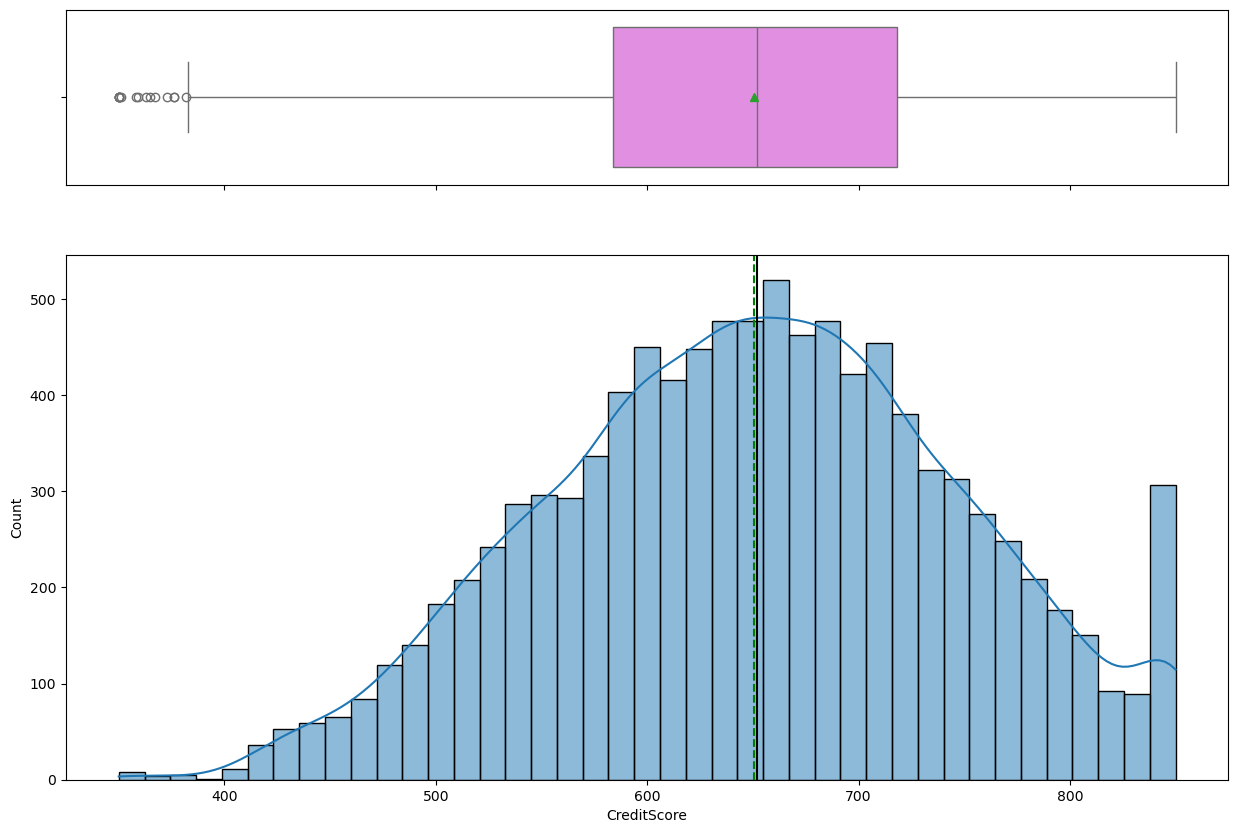

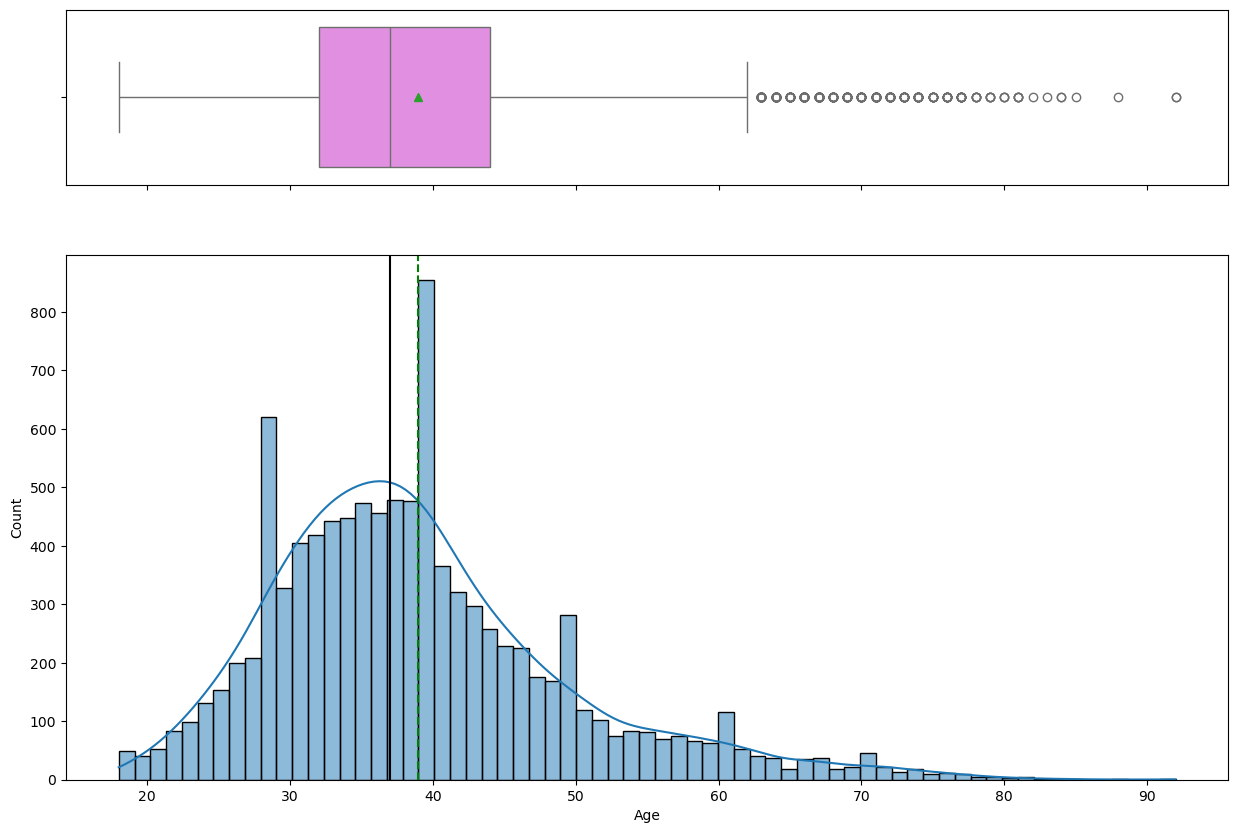

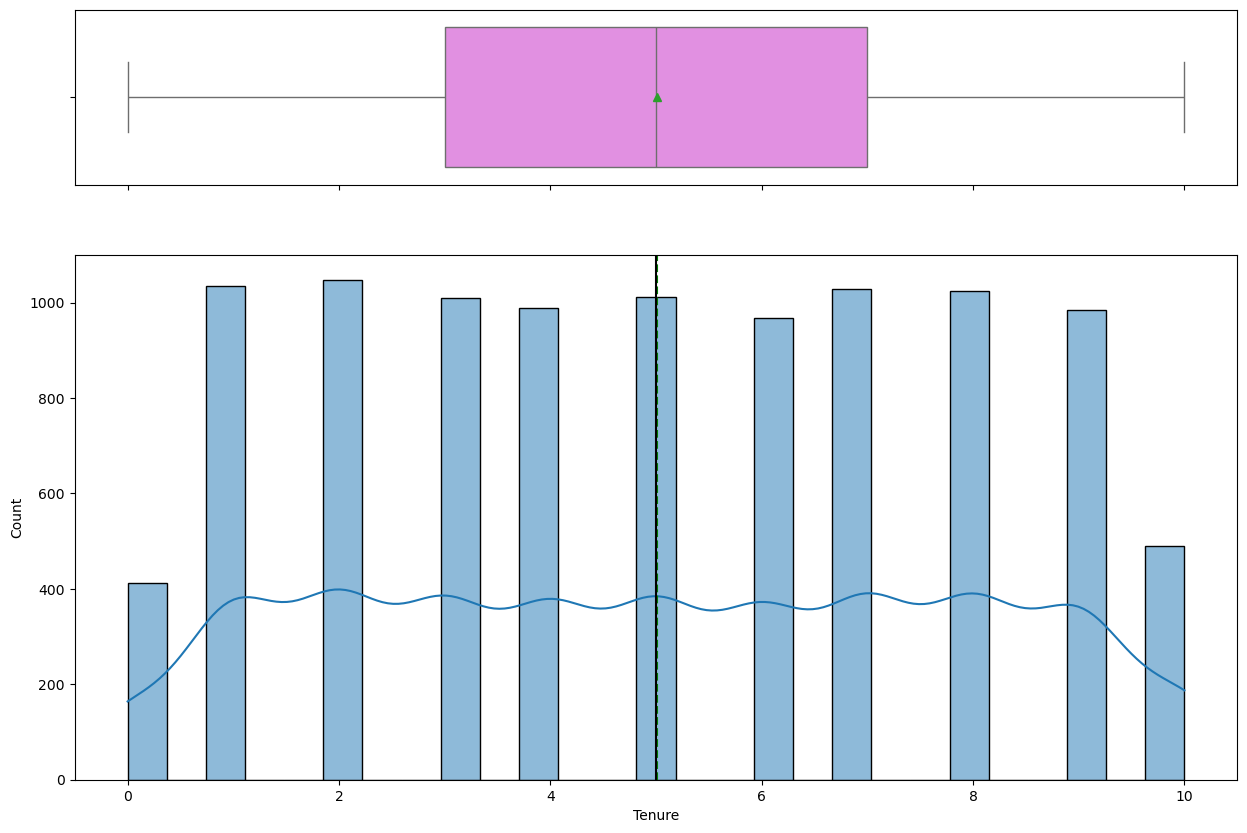

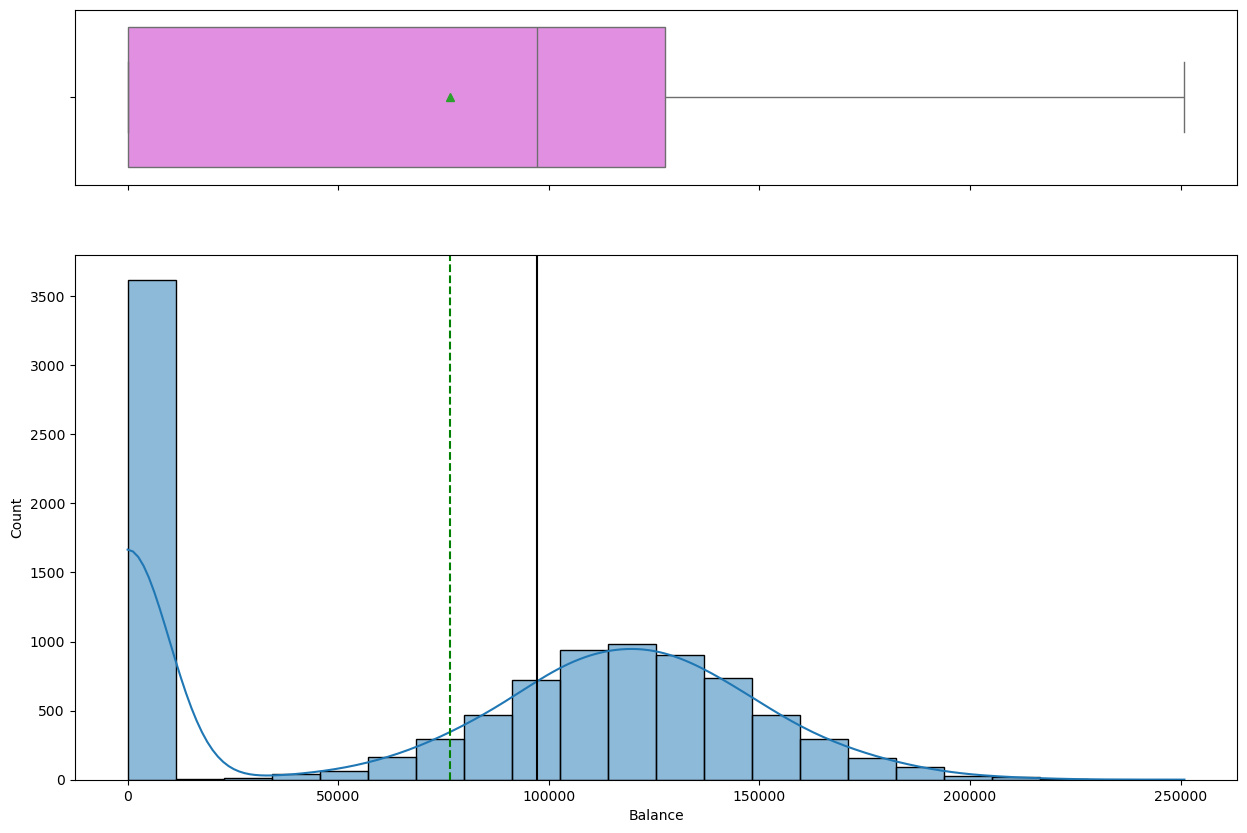

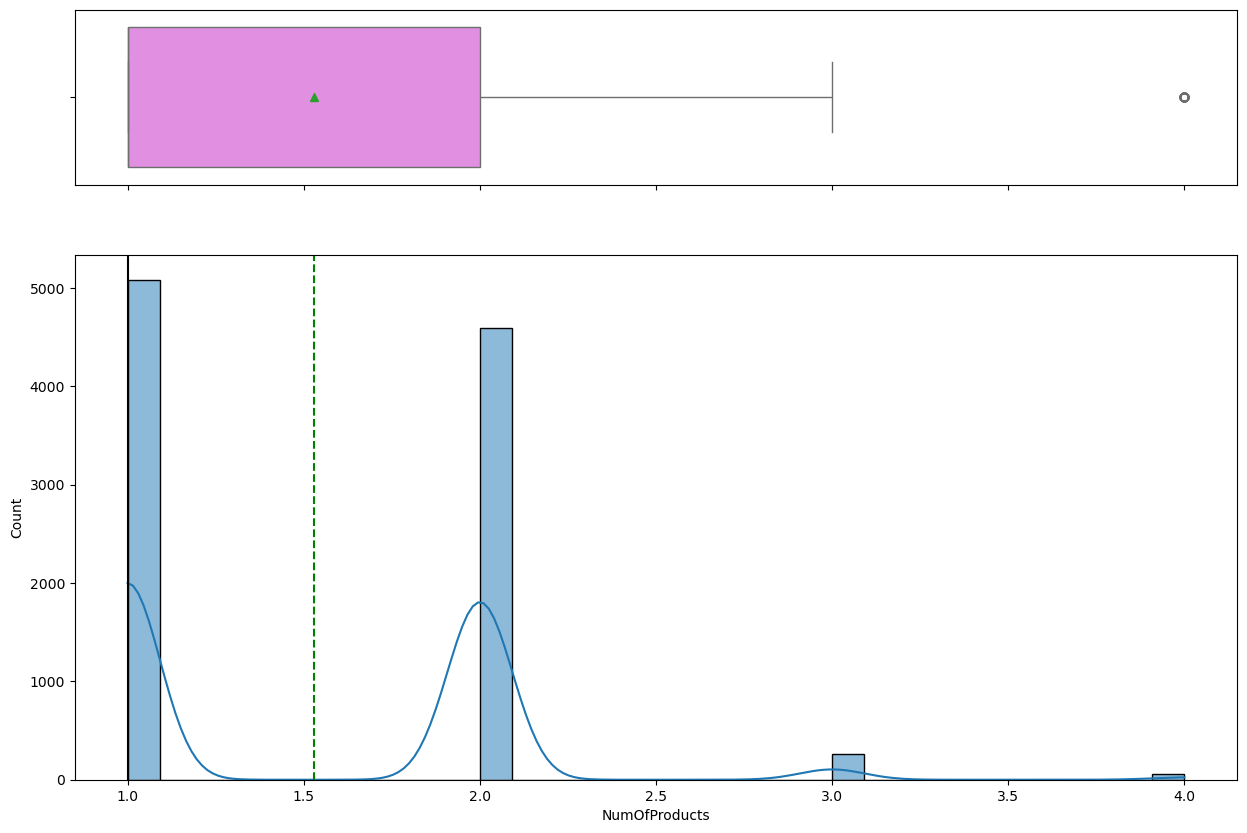

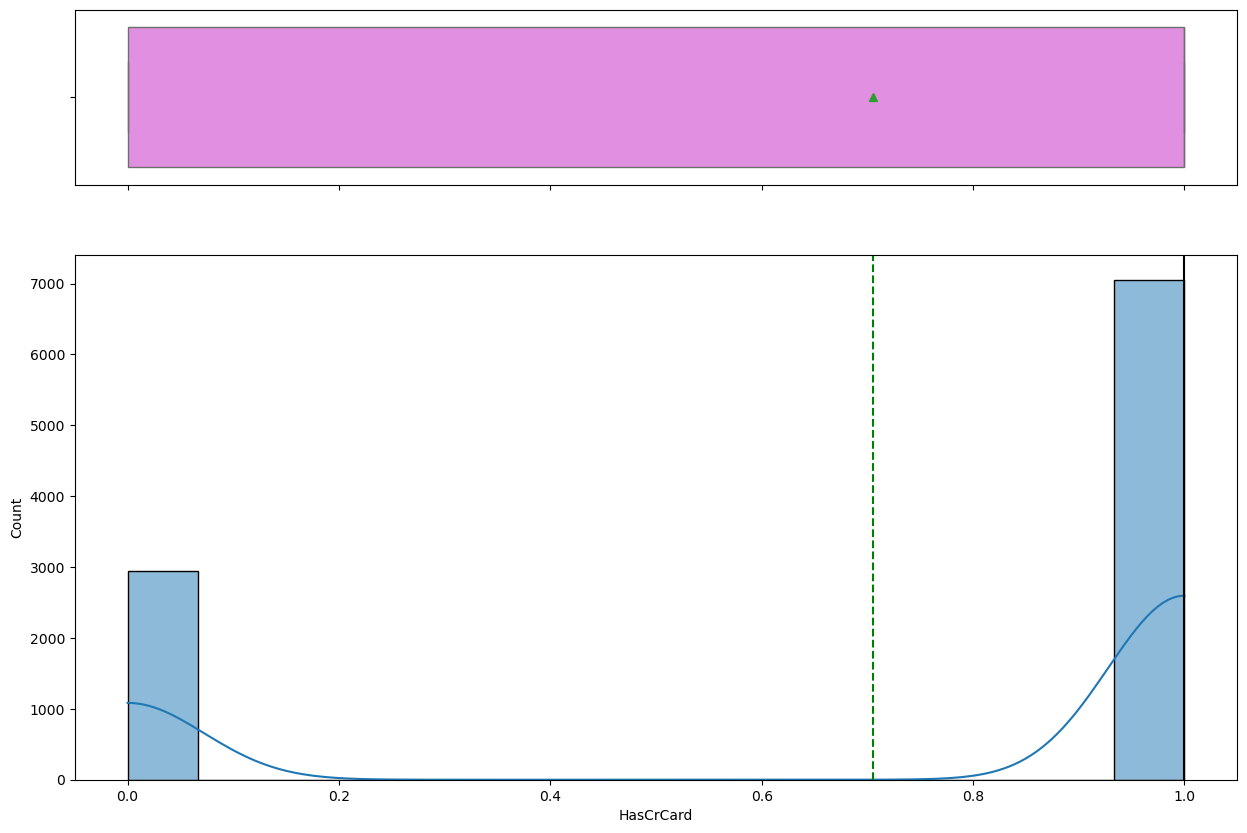

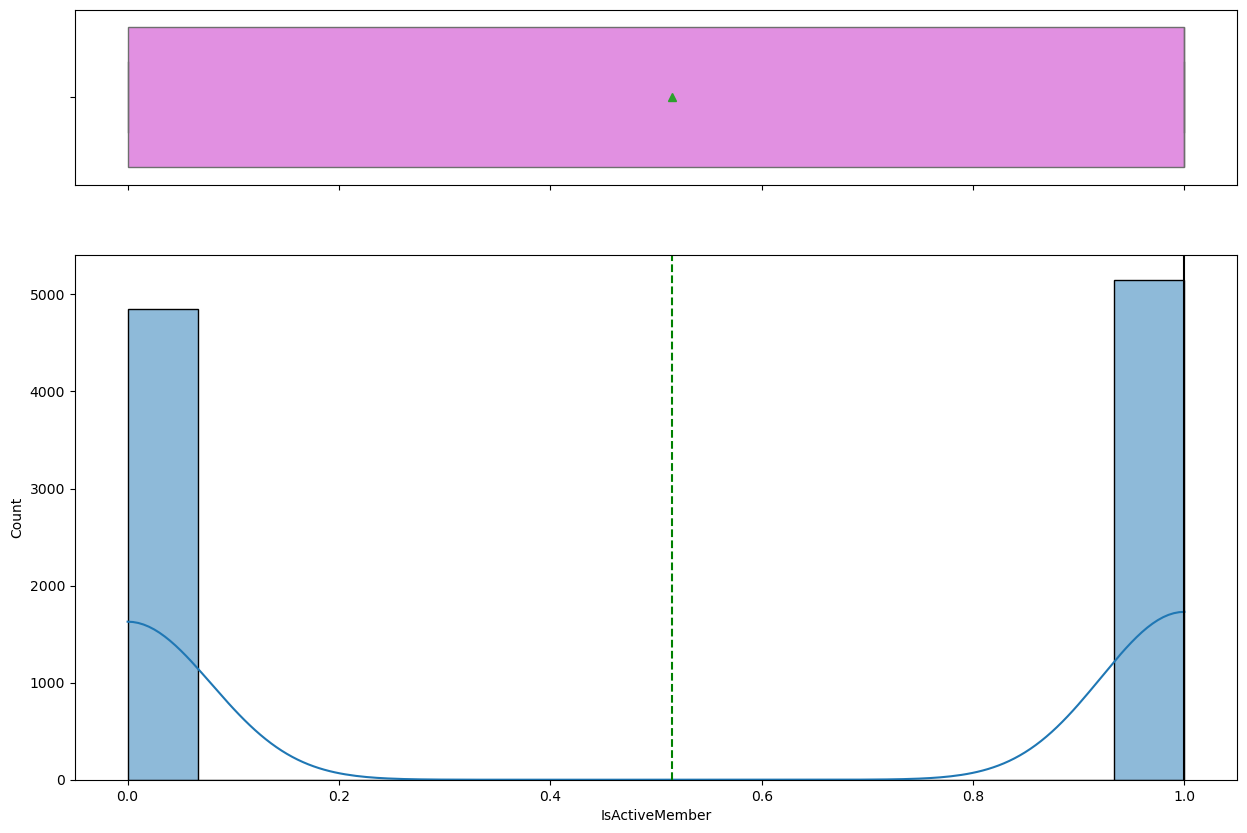

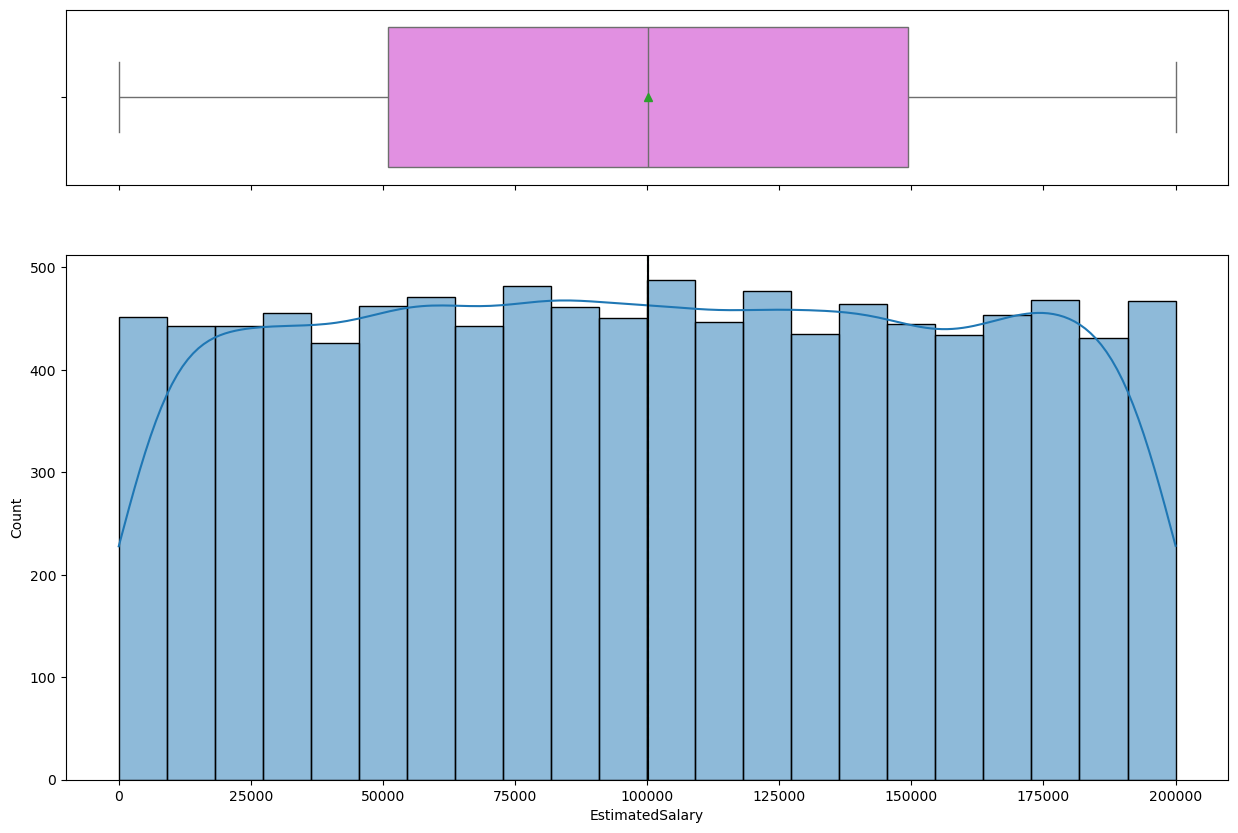

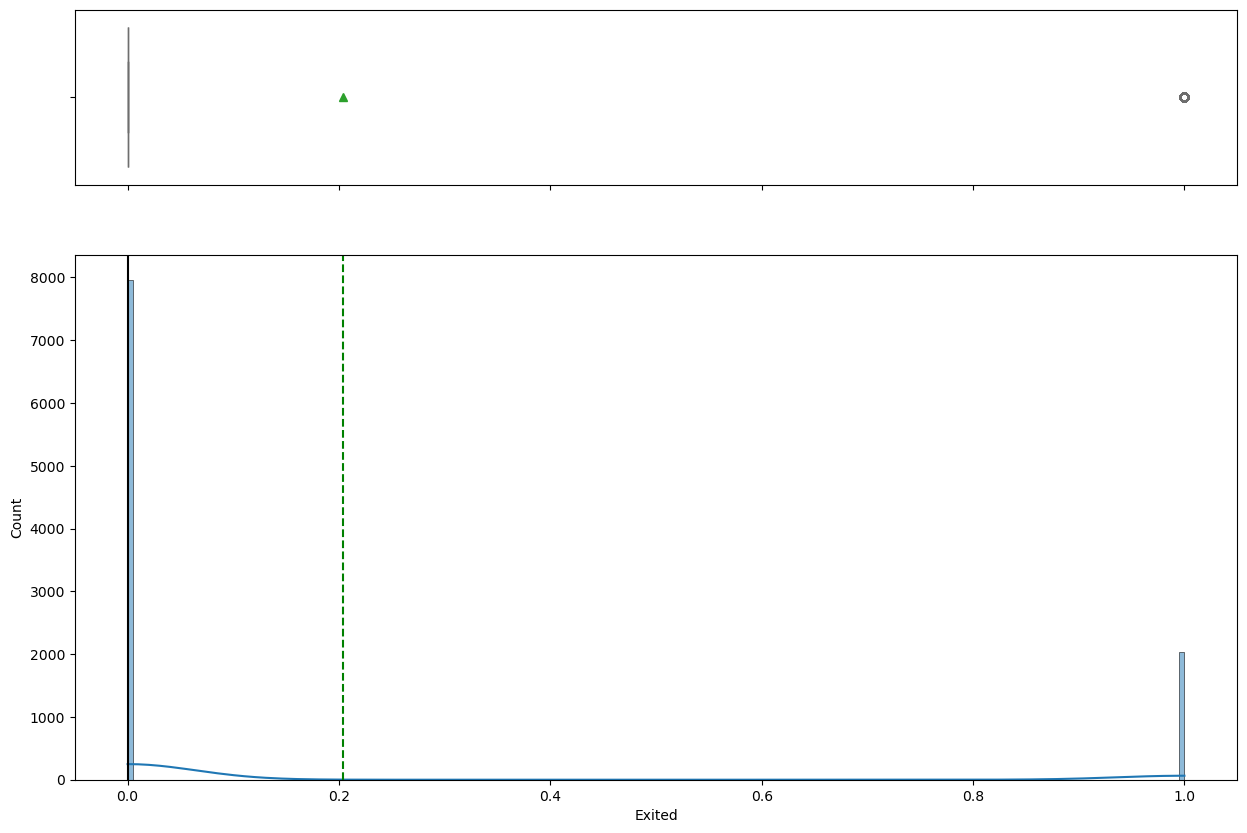

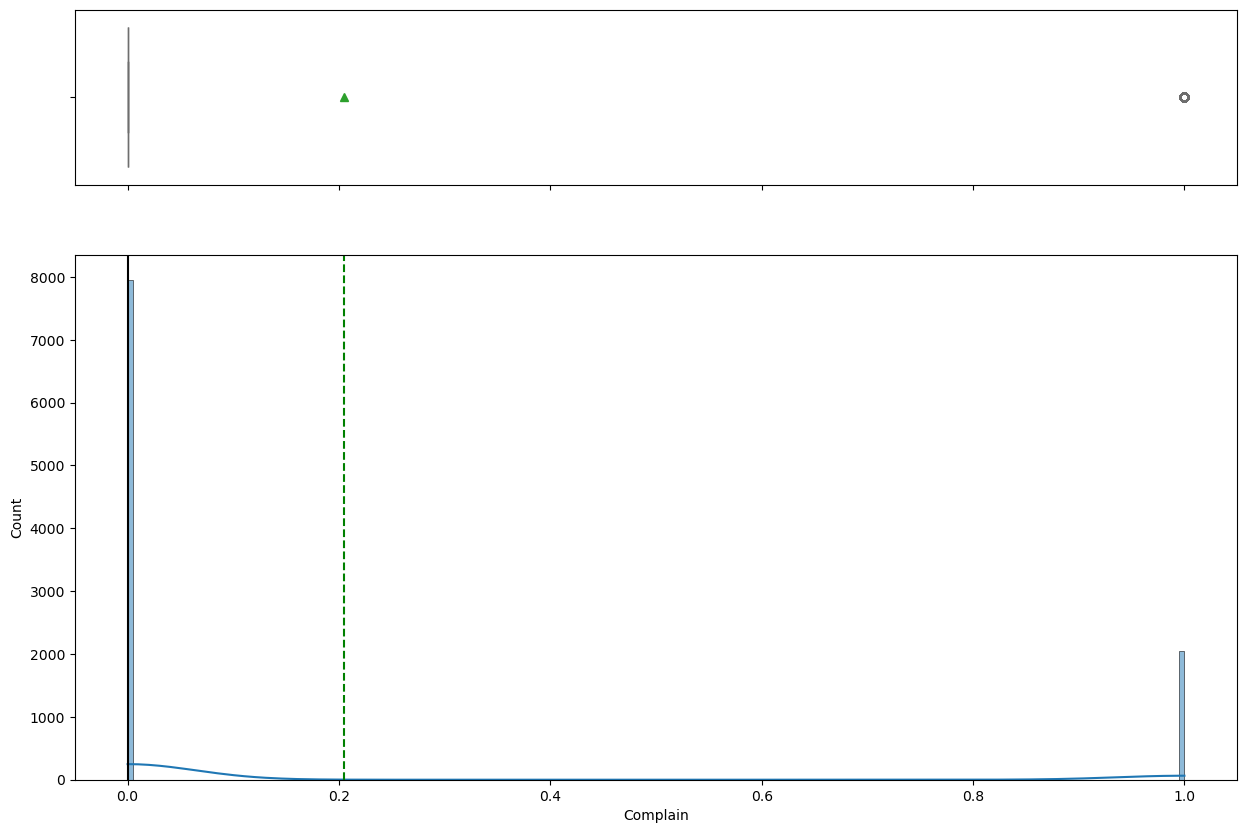

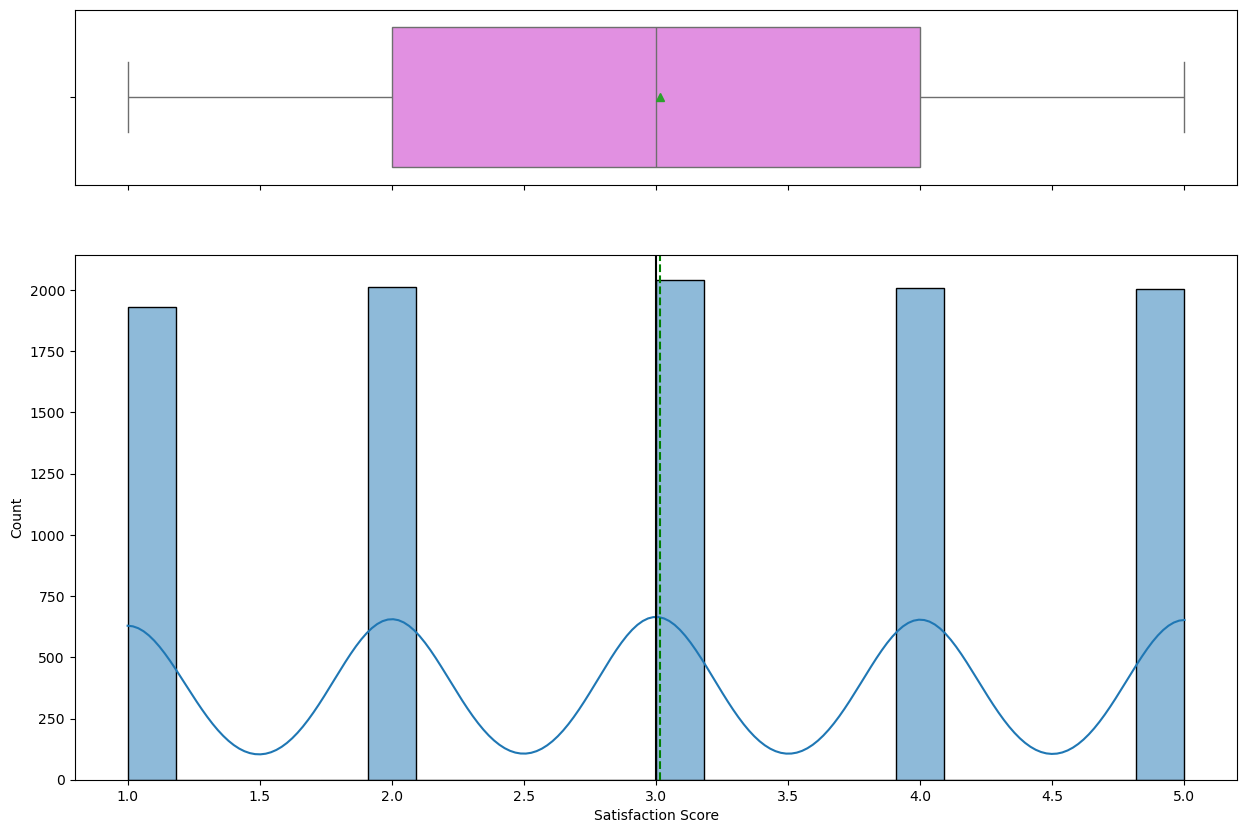

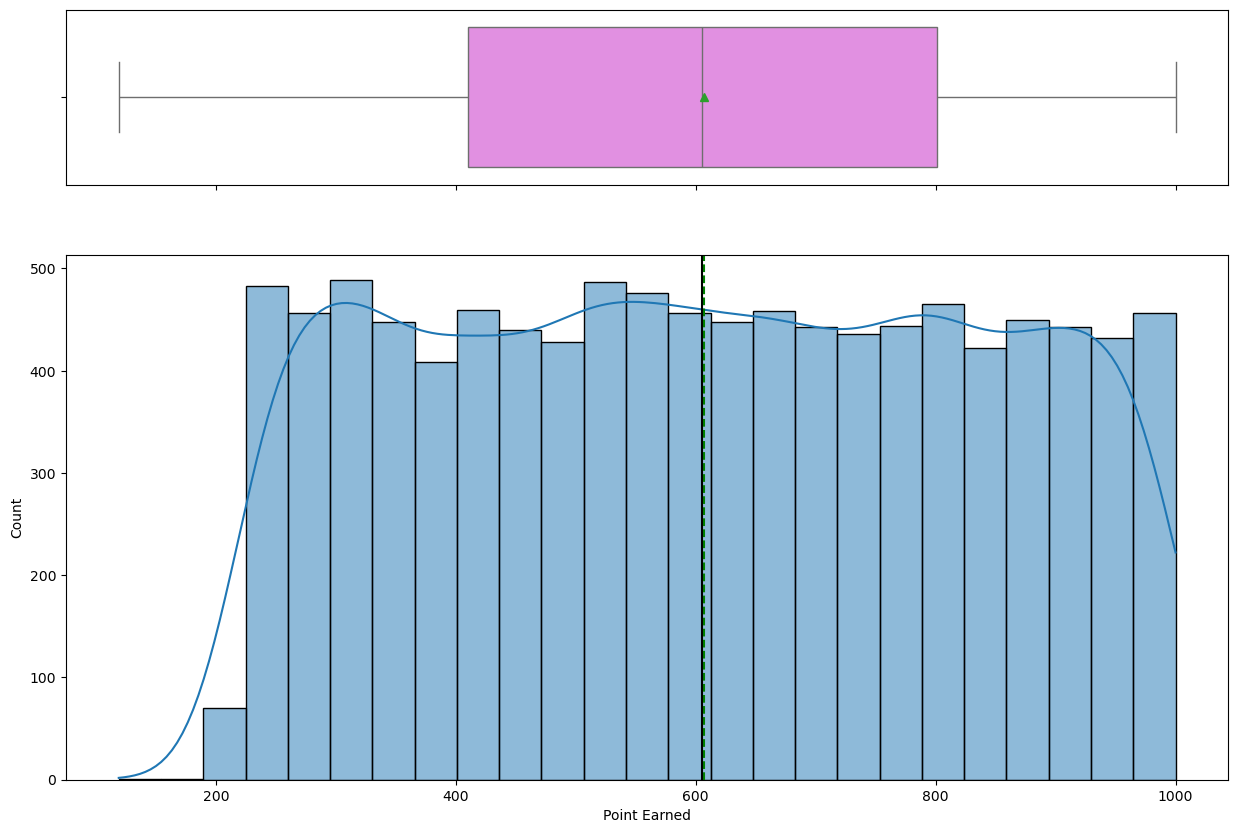

In [21]:
for i in num_columns:
    histogram_boxplot(df, i, kde=True)

- Outliers detected in `Age` and `Balance`, but this are actual values so no treatment will be carried out.
- `CreditScore` looks normally distributed, noting that the cap credit score is conventionally 850.
- `Age` is right skewed.
- `Balance` has large counts of 0, this could mean undisclosed data due to sensitivity. Otherwise, the distribution look normal. We choose not to do anything to this variable.
- `NumOfProducts` majority owns 1-2 products of the bank.
- Some interesting uniform distribution behaviour on `Tenure`, `EstimatedSalary`, `Satisfaction Score` and `Point Earned`

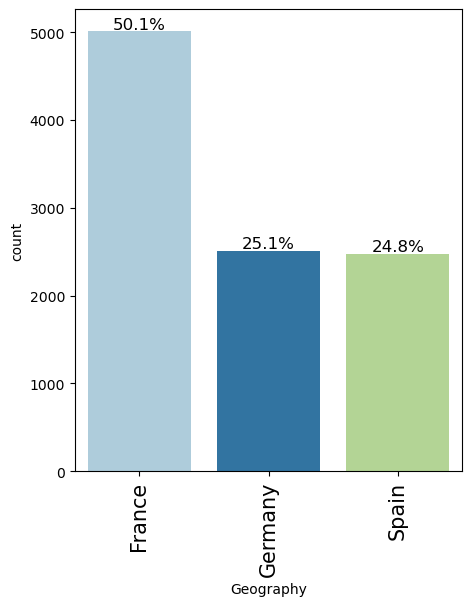

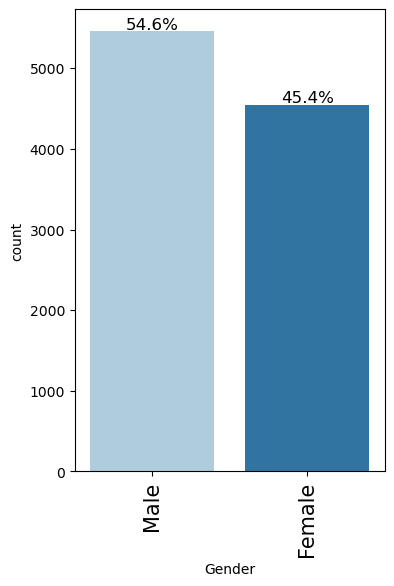

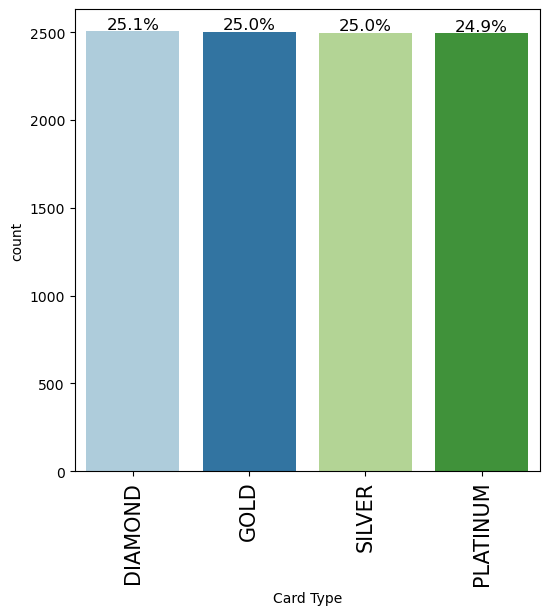

In [22]:
for i in cat_columns:
    labeled_barplot(df, i, perc=True, n=None)

- There are 3 main geographical country namely France, Germany and Spain. Most customers are from France. While the bank has roughly equal number of germans and spanish.
- There are more males customers, by about 9.2%
- 70.5% has credit card
- Active members are almost 50/50.
- There's 20.4% of customers left the bank, same number of percentage to those who complaint.
- Card type customers own is interestingly evenly distibuted.

#### Multivariate

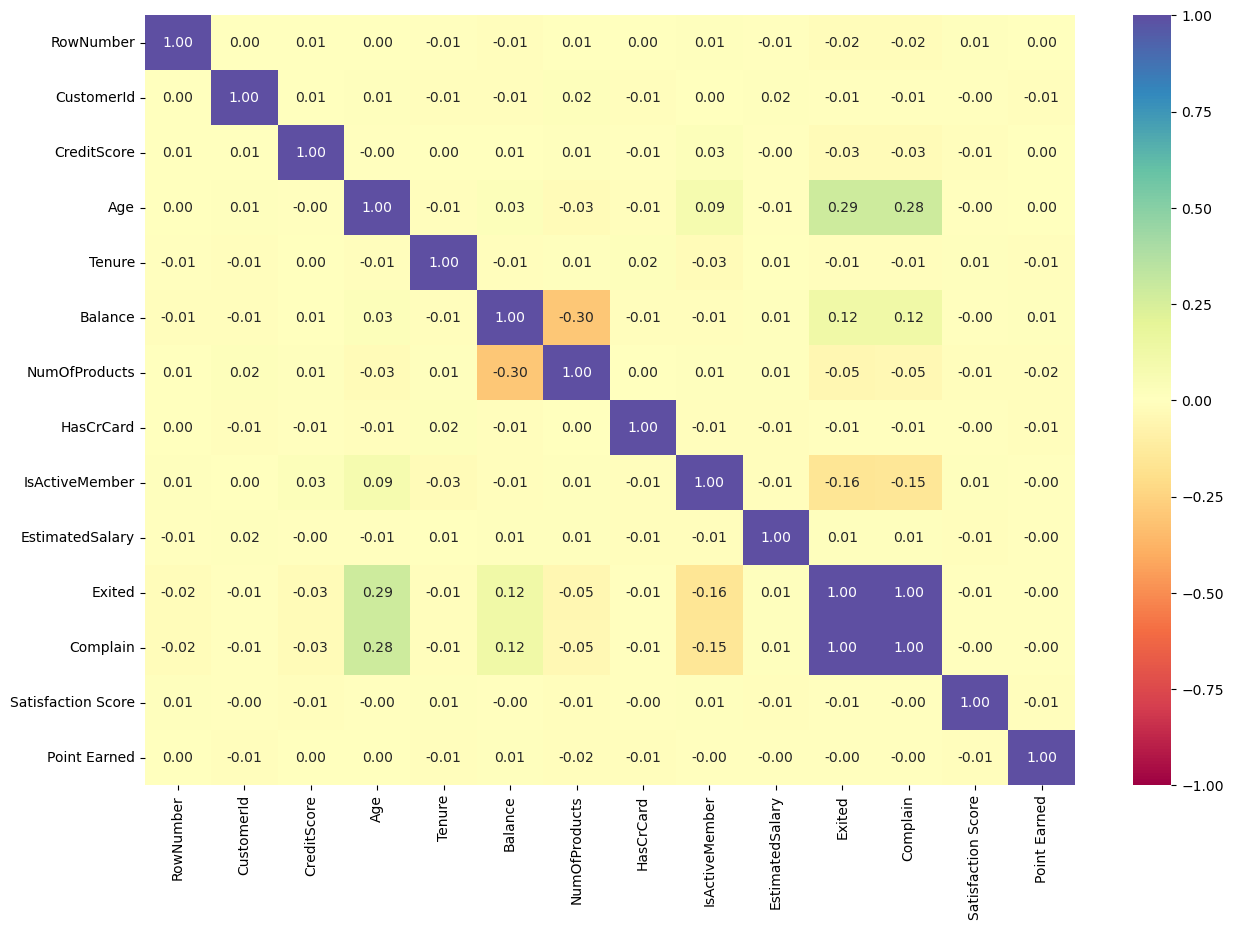

In [23]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 10))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
) ## Complete the code to find the correlation between the variables
plt.show()

We now look at the bank's target variable `Exited`

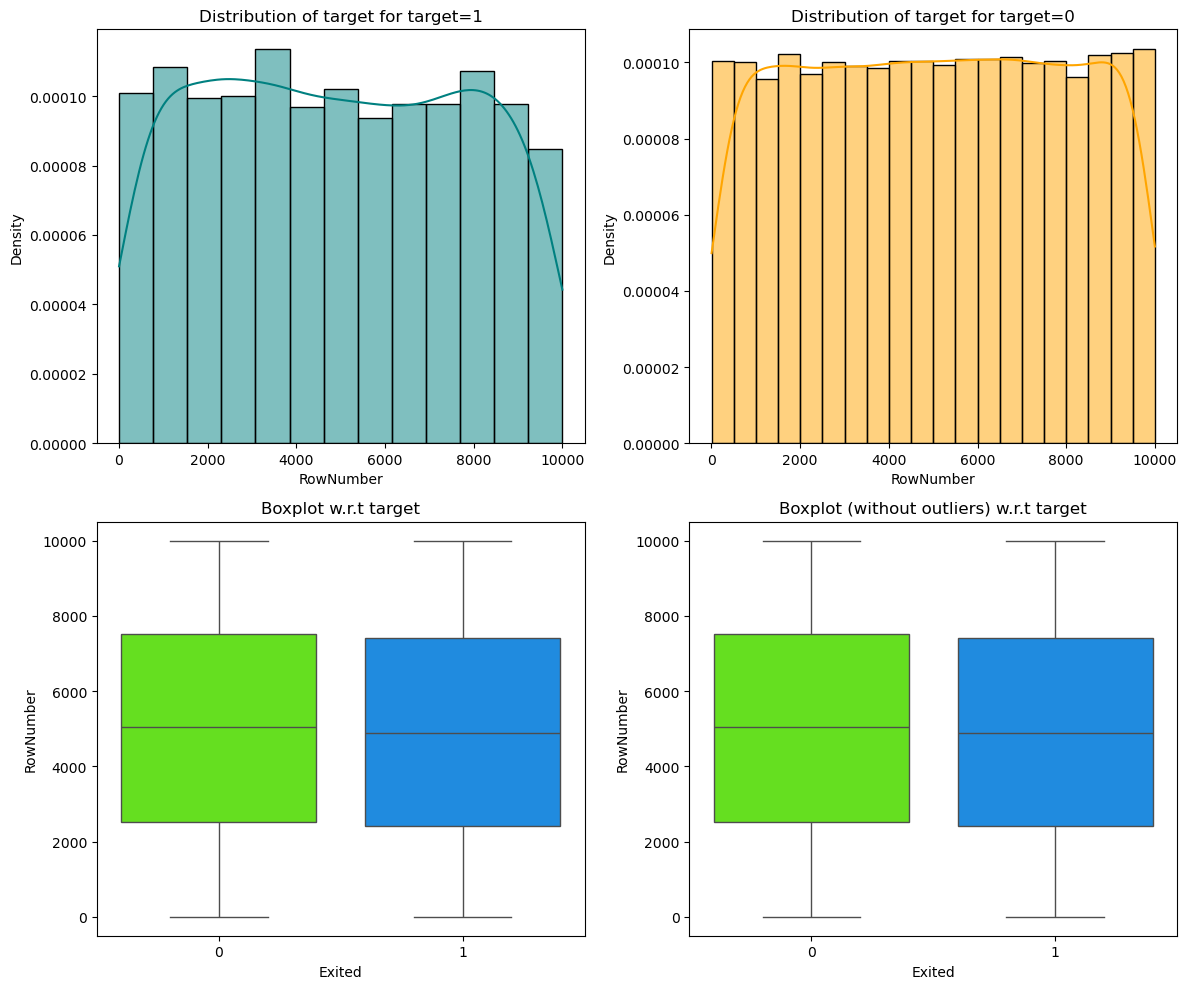

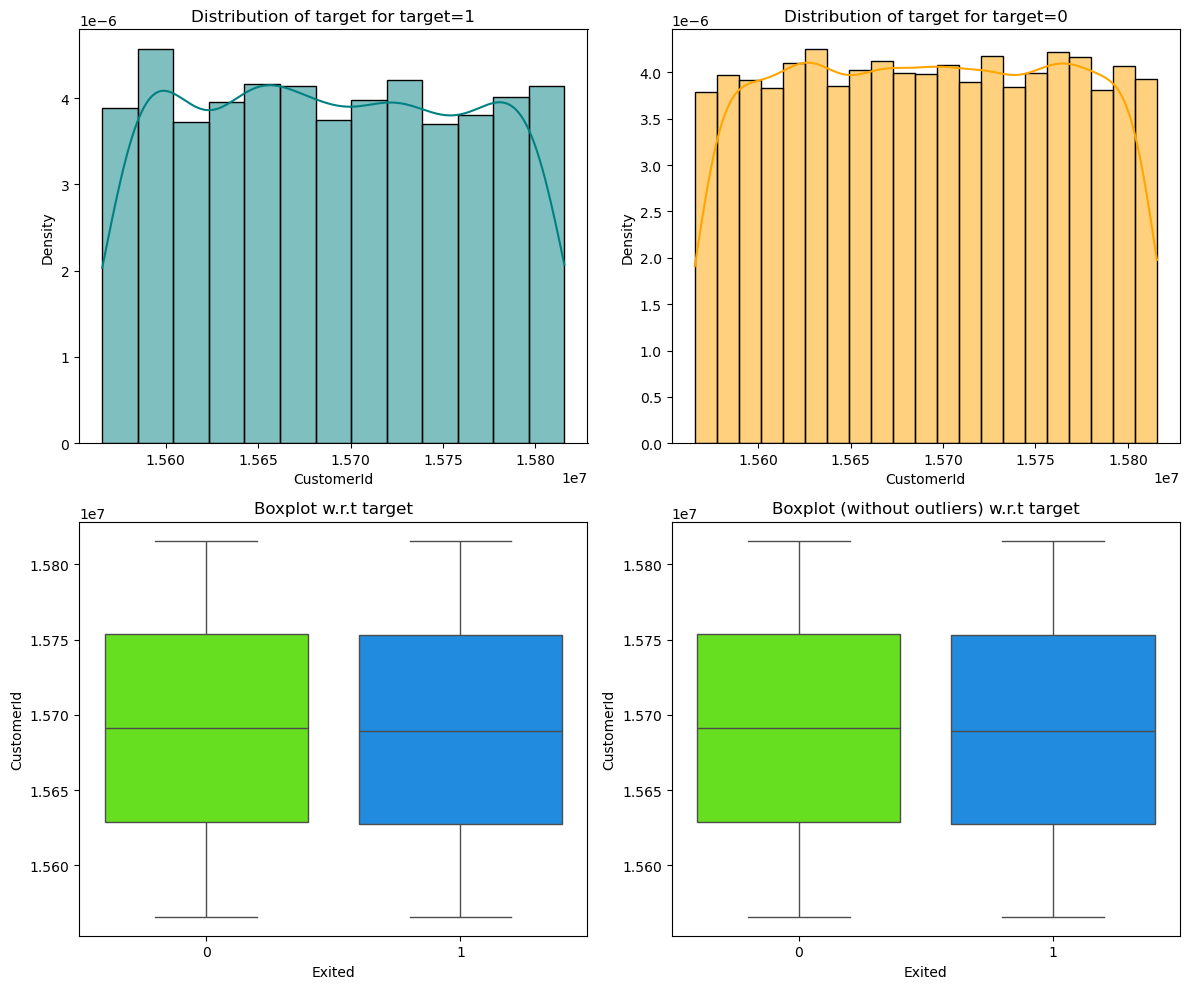

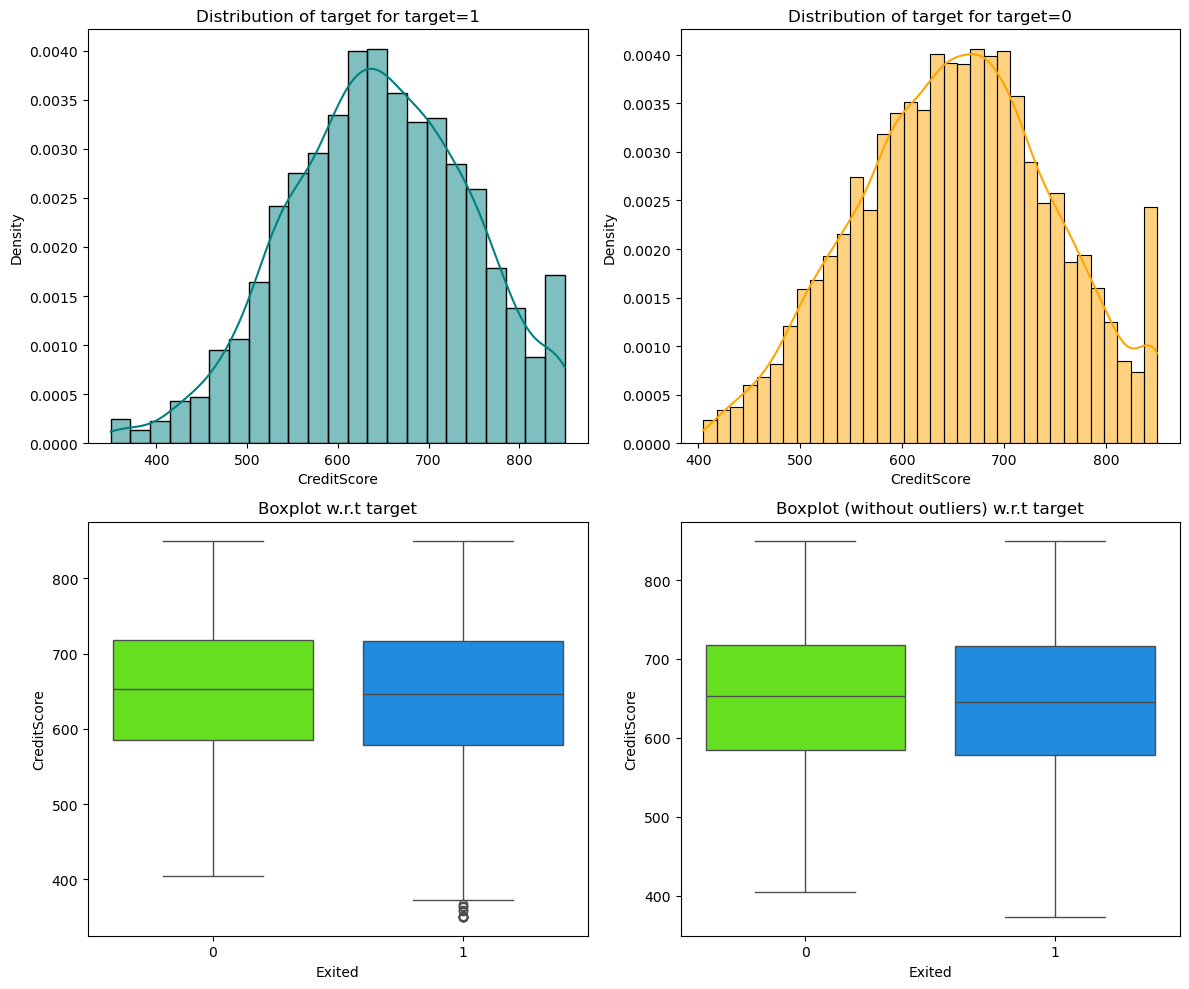

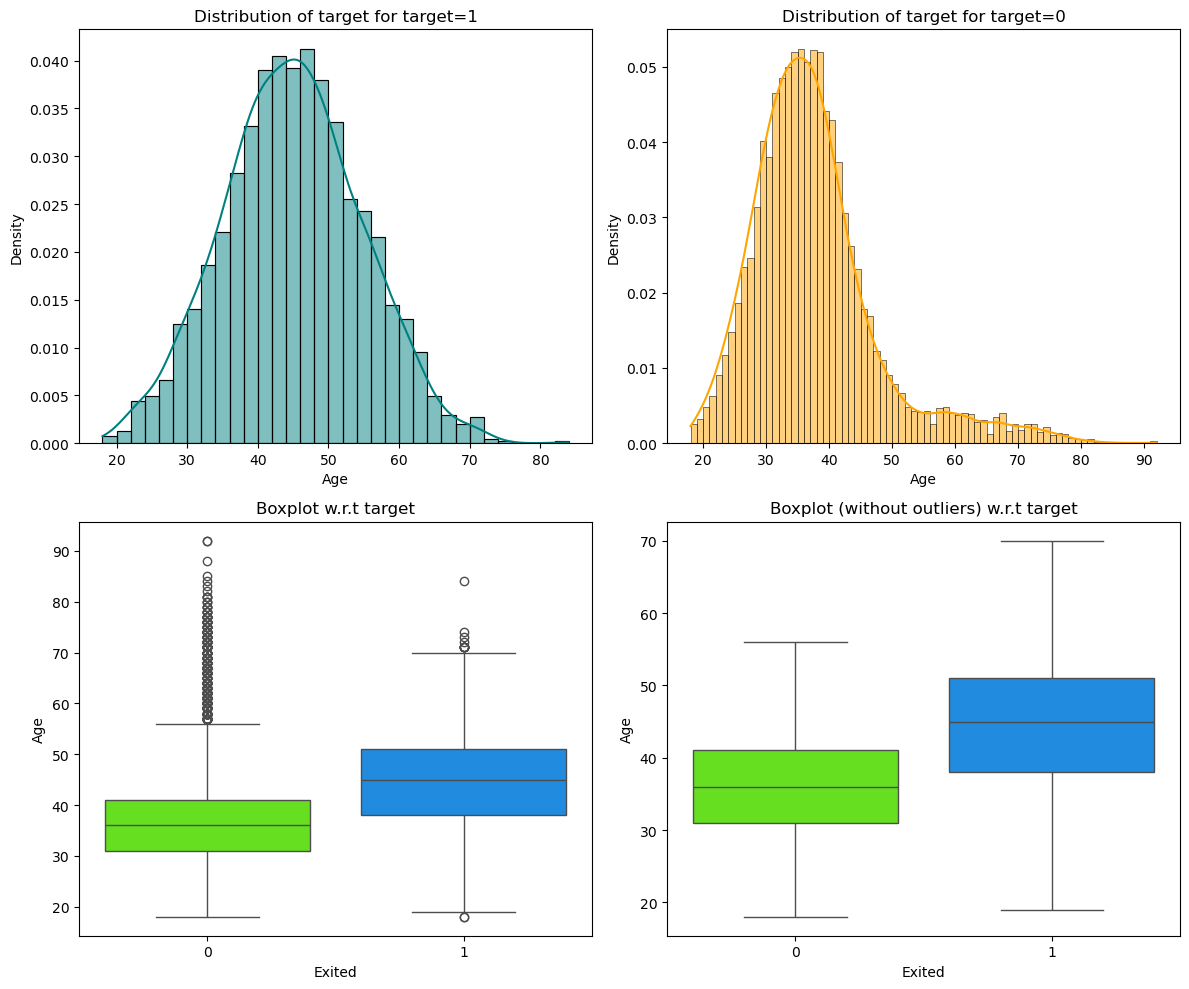

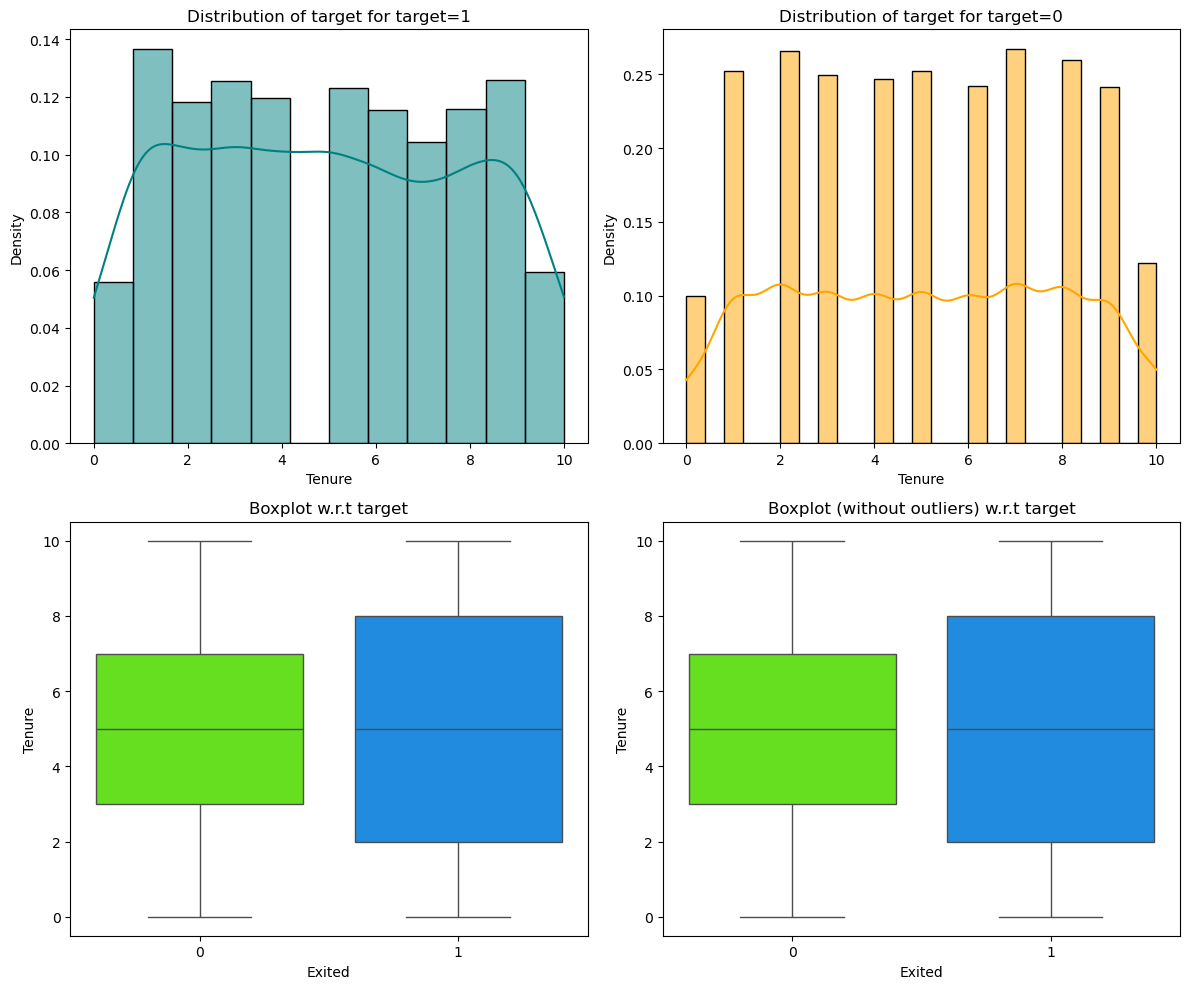

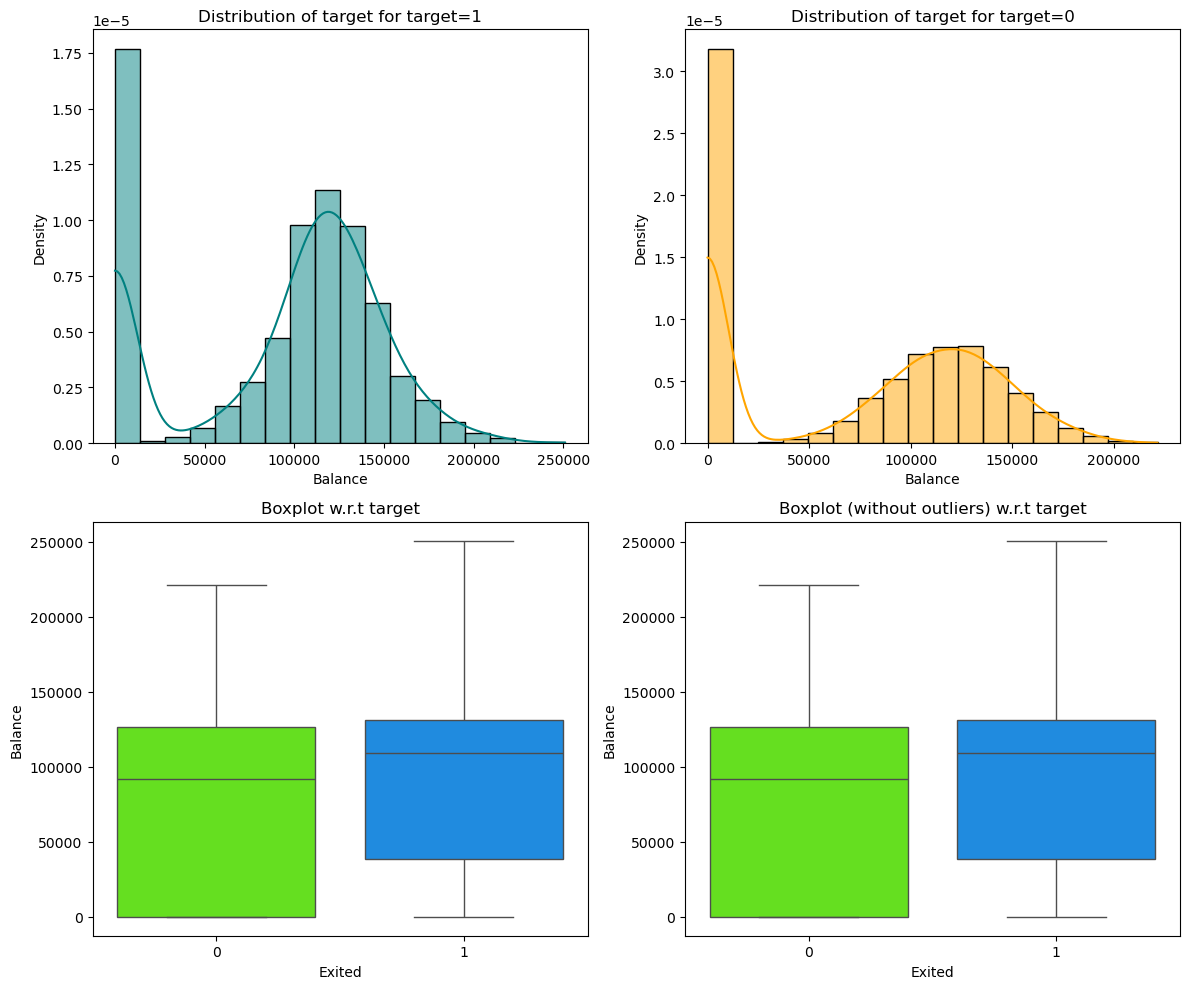

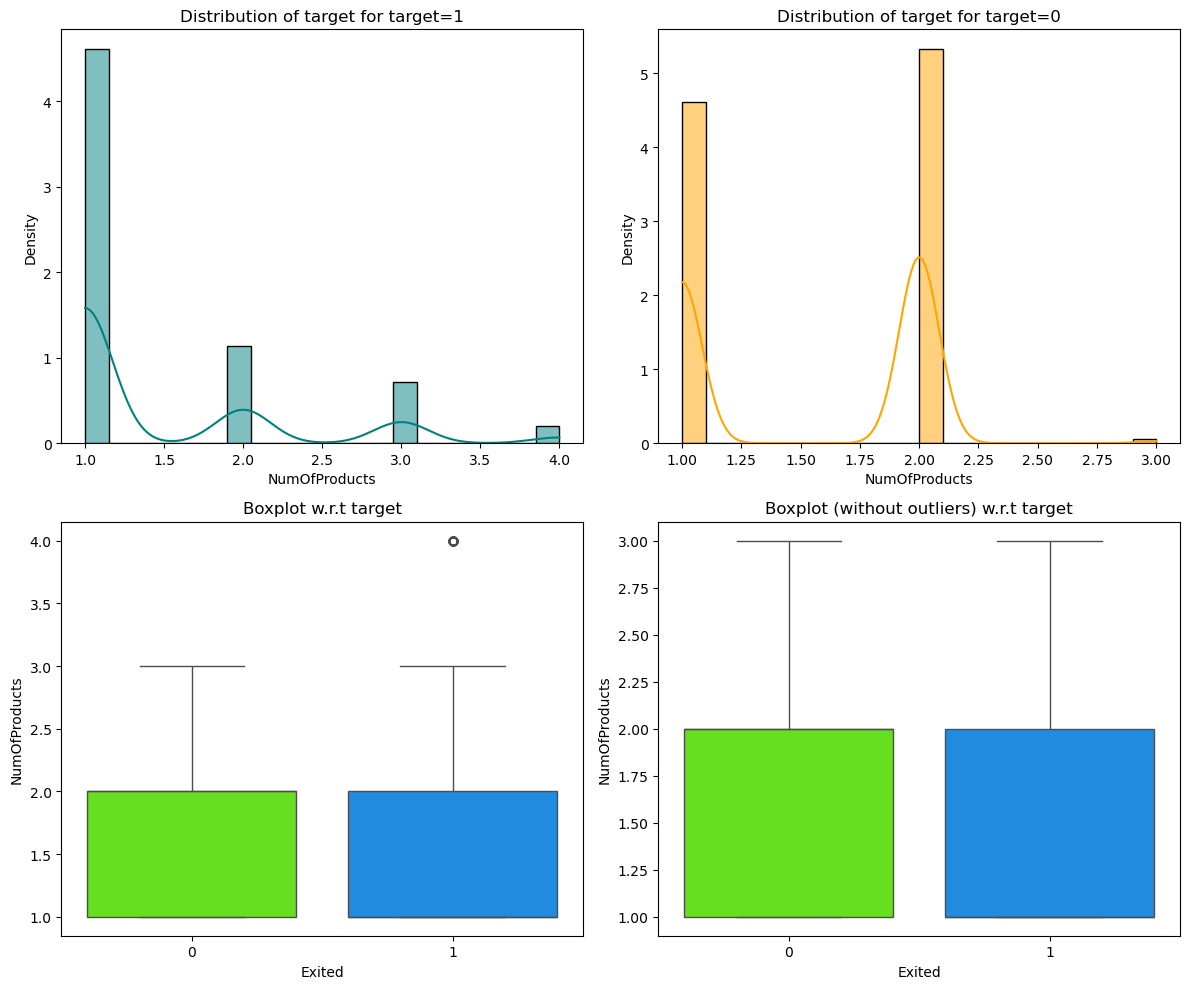

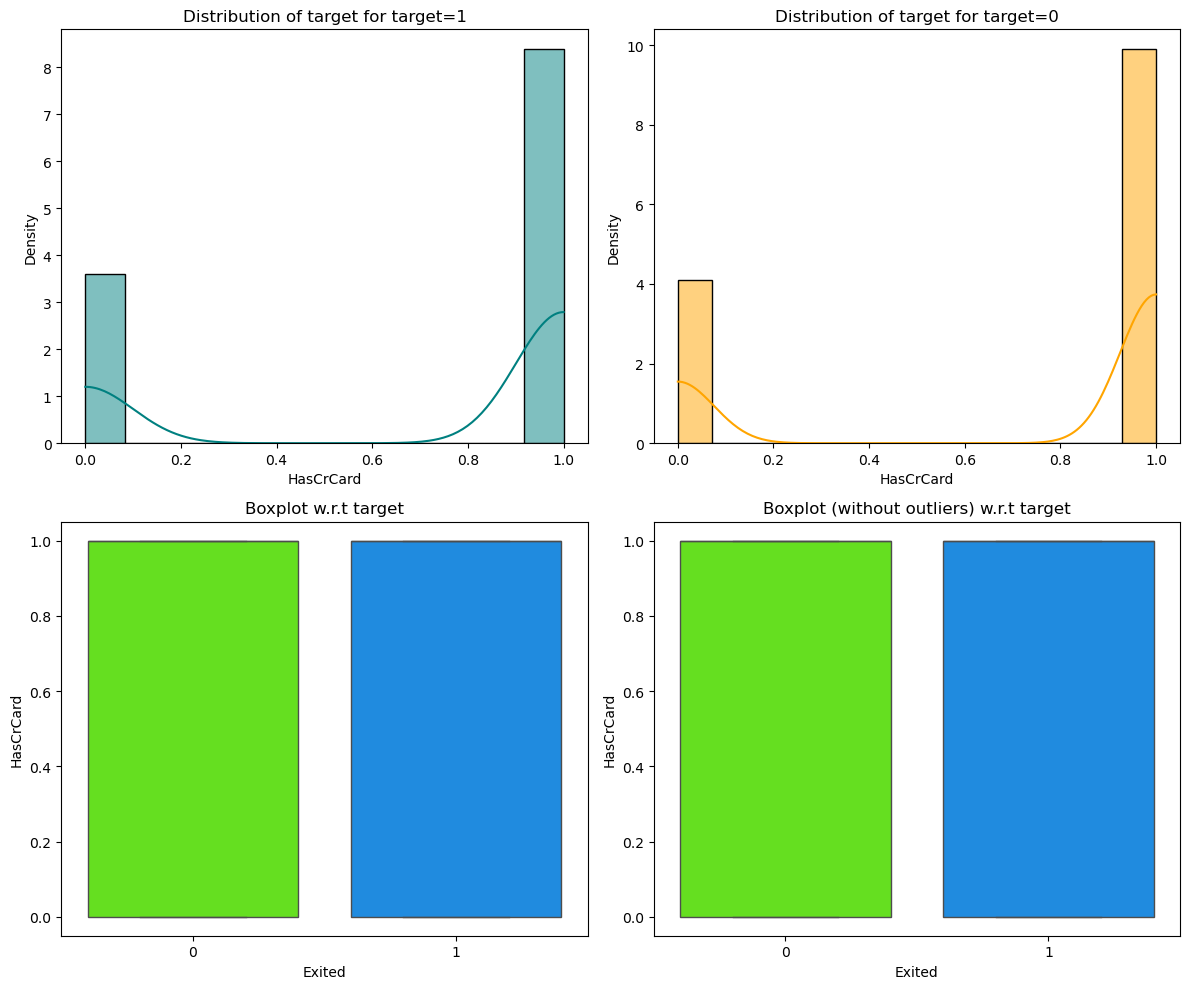

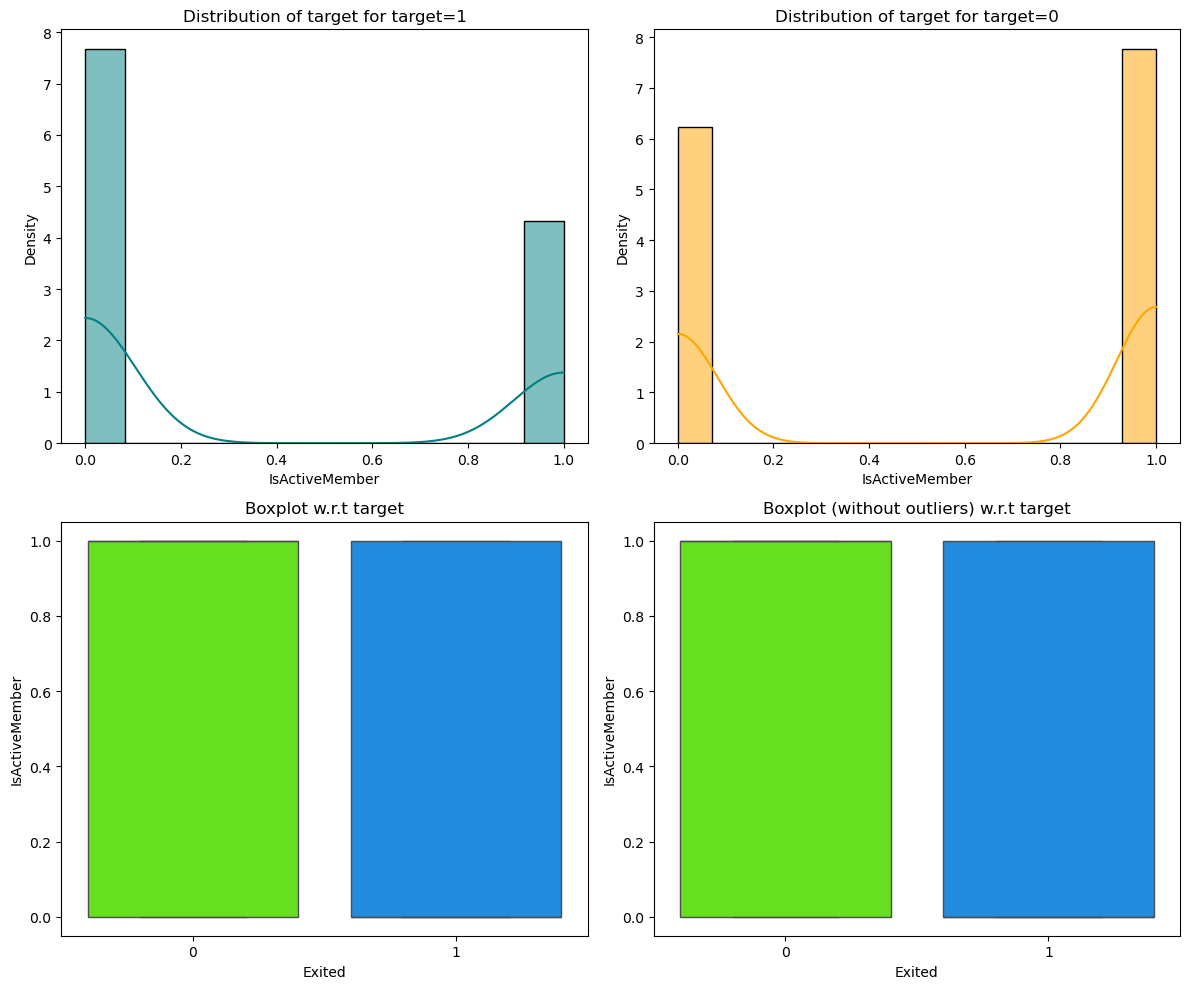

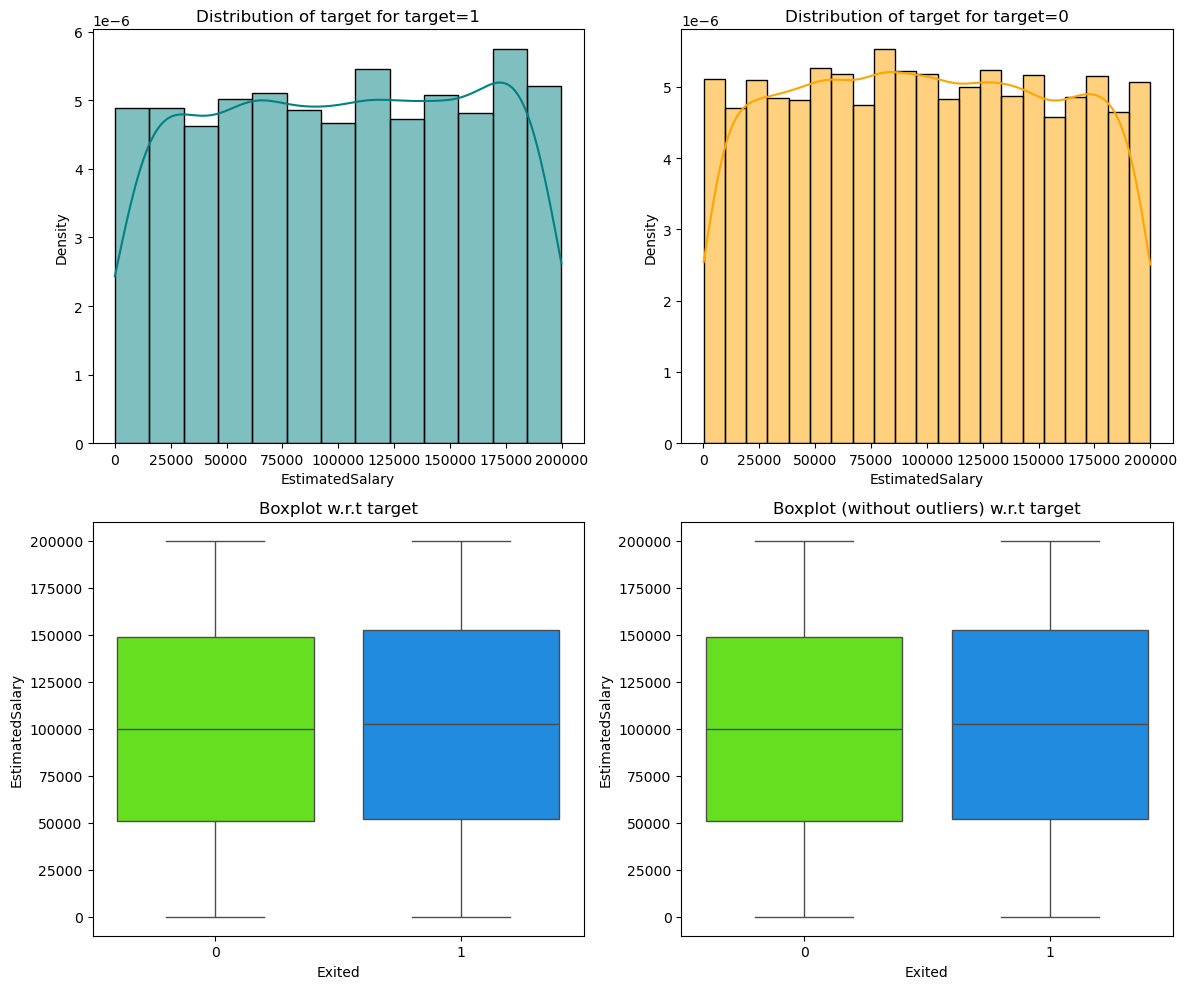

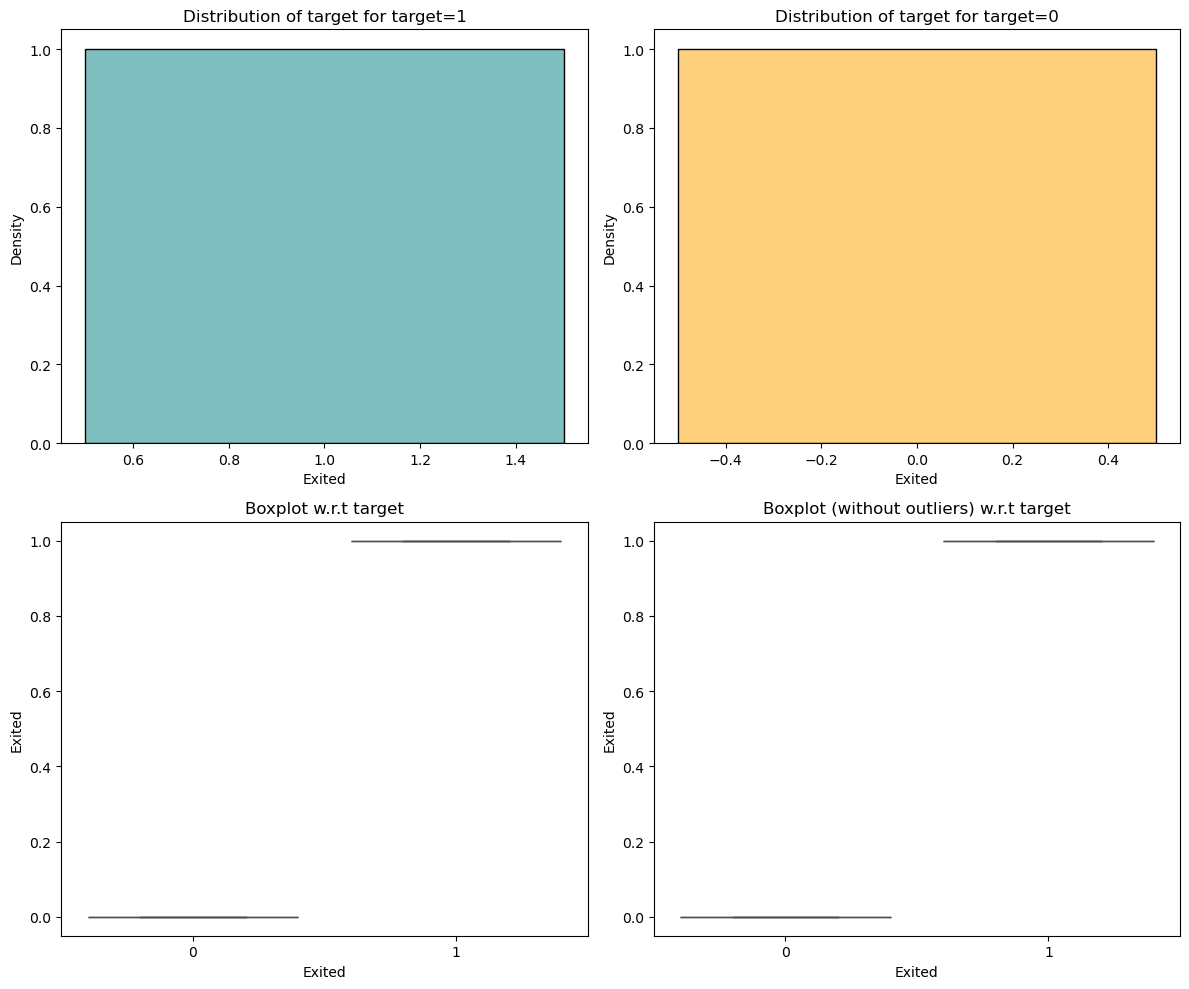

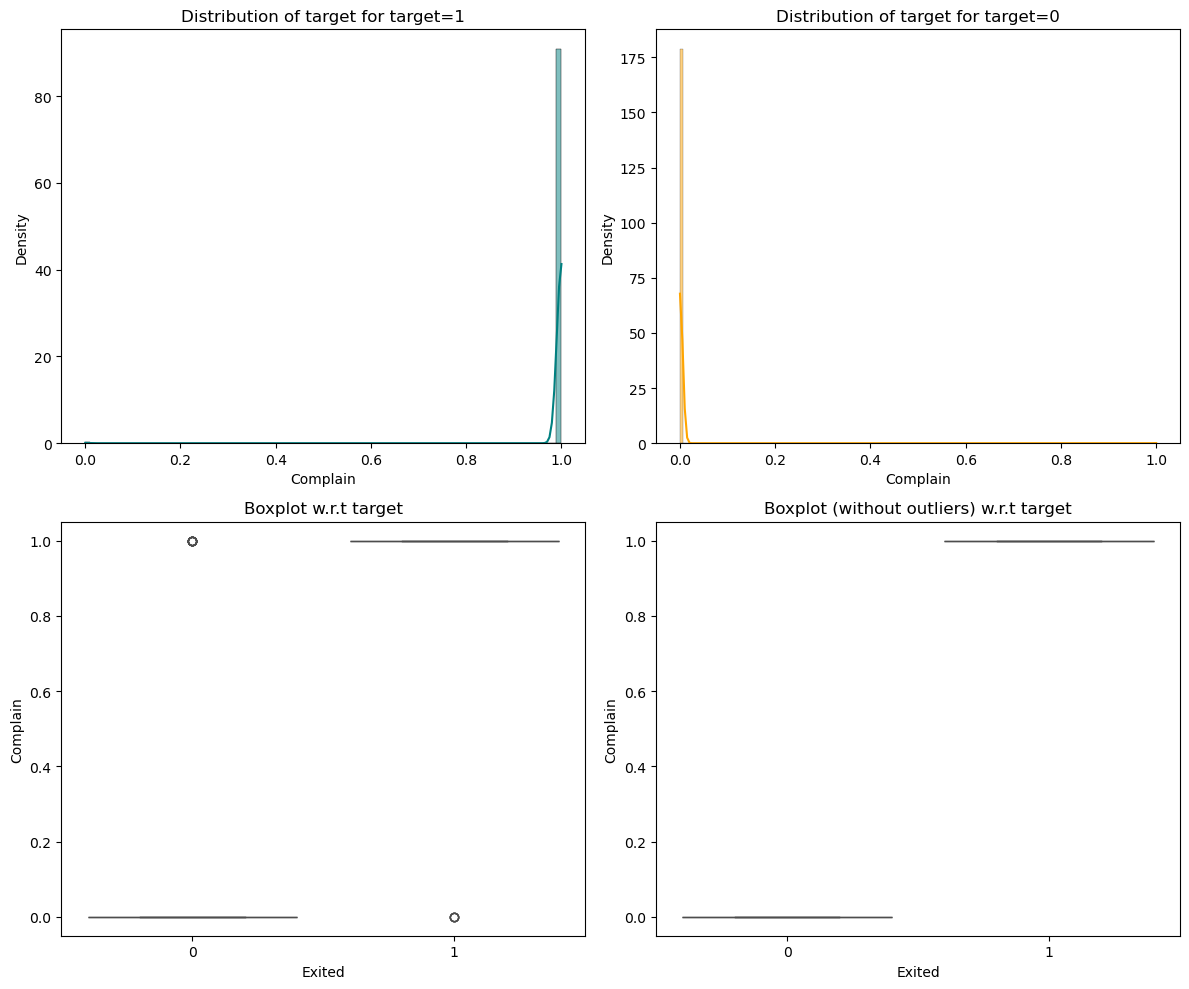

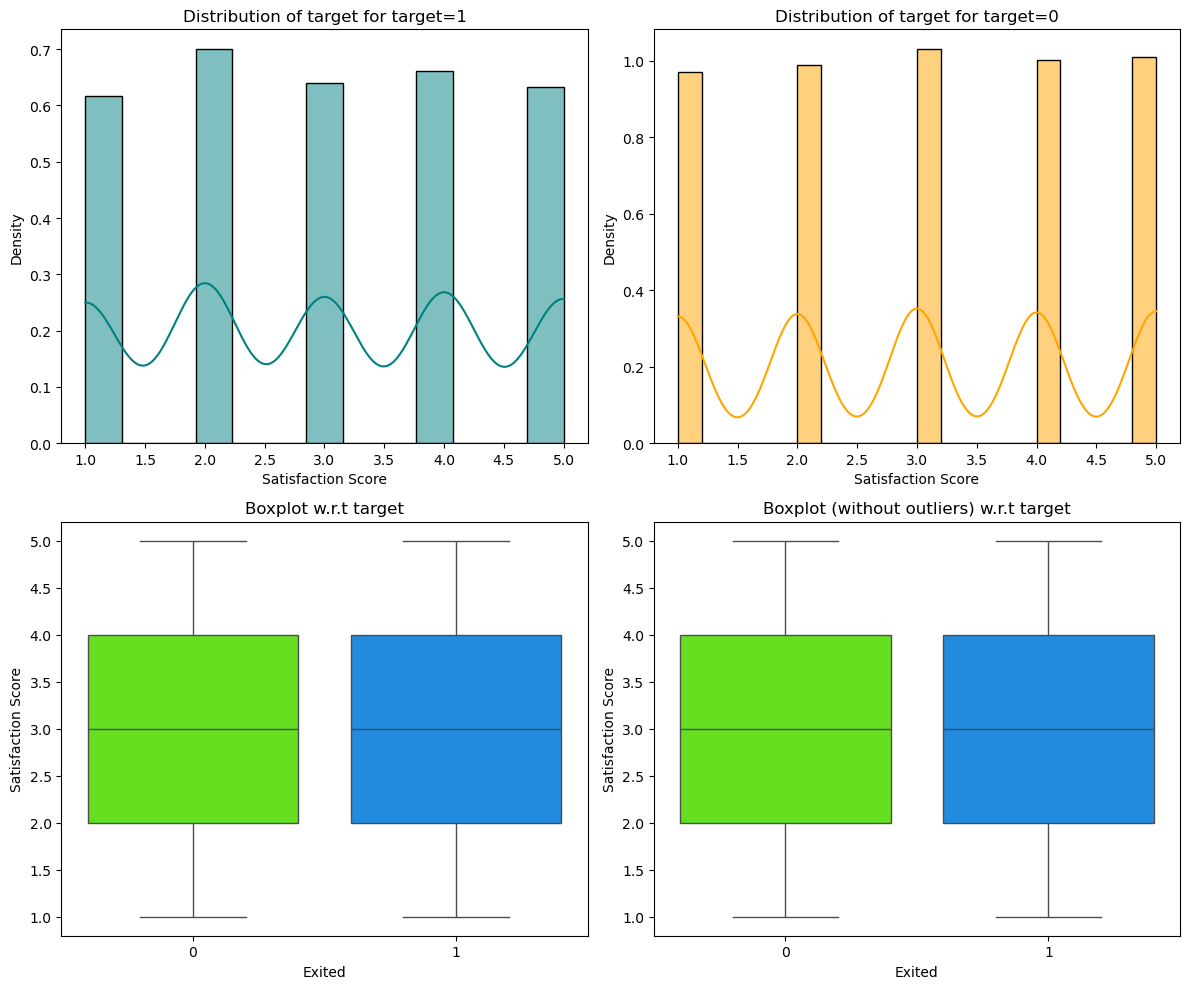

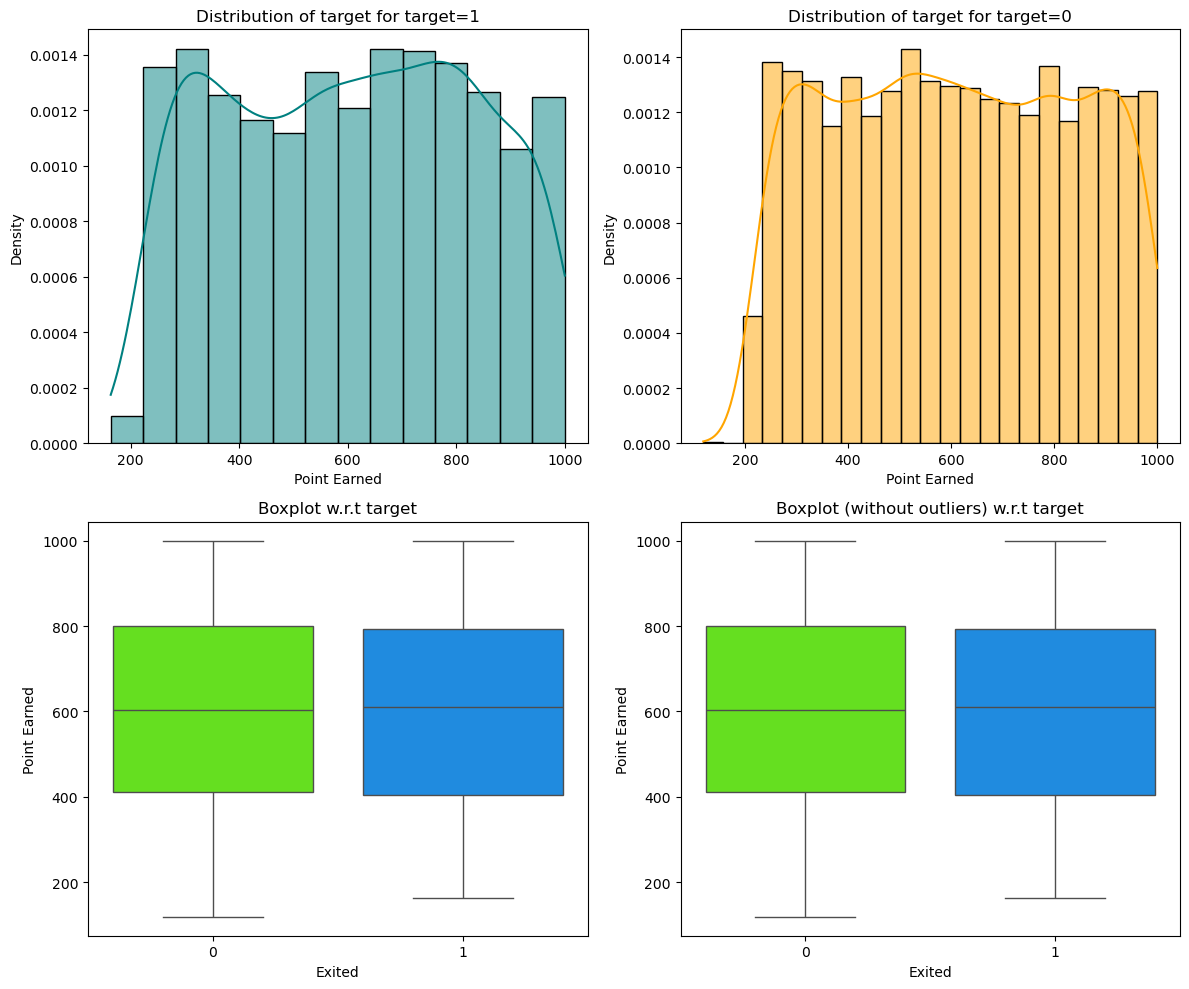

In [24]:
for i in num_columns:
    distribution_plot_wrt_target(df, i , "Exited")

`CreditScore` vs `Exited`
- There doesn't seem to be any pattern observed.
- However there is a hint of lower credit score customer leaving the bank.

`Age` vs `Exited`
- We can see apparent pattern, Customer in the age range 40-50 leaves the bank more often. While 30-40 generally stays.
- Old customers generally stays too.

`Tenure` vs `Exited`
- No obvious pattern.

`Balance` vs `Exited`
- 0 balance will need to be treated.

`NumOfProducts` vs `Exited`
- No obvious pattern.

`EstimatedSalary` vs `Exited`
- the estimated salary is uniformly distributed.

`Satisfaction Score` vs `Exited`
- No obvious pattern other than unifrom distribution.

`Point Earned` vs `Exited`
- Again no obvious pattern.

Exited        0     1    All
Geography                   
All        7962  2038  10000
Germany    1695   814   2509
France     4203   811   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


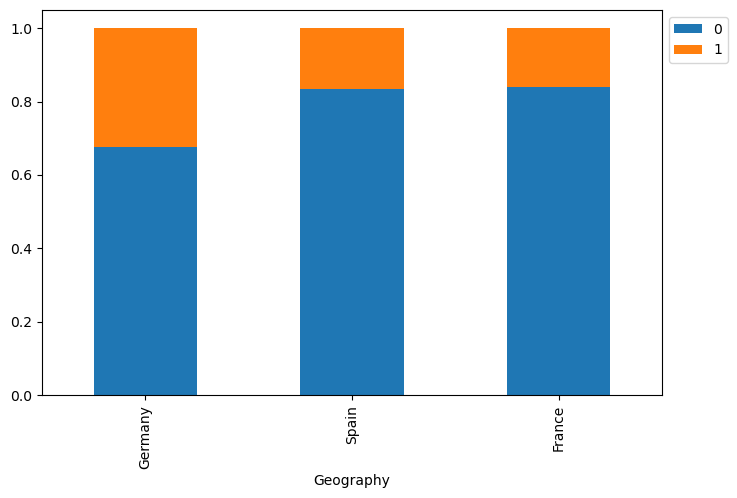

In [25]:
stacked_barplot(df, 'Geography', "Exited")

- Germans are more active in leaving the bank

Exited     0     1    All
Gender                   
All     7962  2038  10000
Female  3404  1139   4543
Male    4558   899   5457
------------------------------------------------------------------------------------------------------------------------


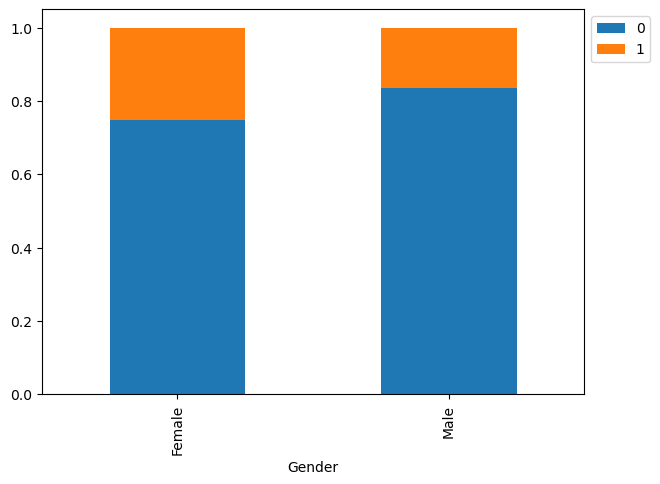

In [26]:
stacked_barplot(df, 'Gender', "Exited")

- There are more females who exits compare to male

Exited        0     1    All
HasCrCard                   
All        7962  2038  10000
1          5630  1425   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


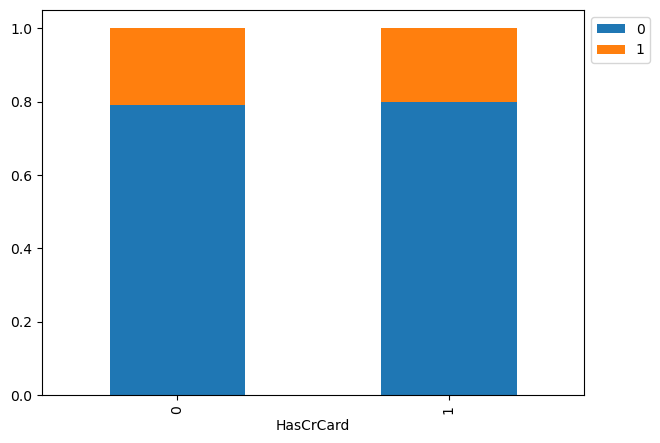

In [27]:
stacked_barplot(df, 'HasCrCard', "Exited")

- There seem to be no obvious pattern in regards whether a customer has credit card or not.

Exited             0     1    All
IsActiveMember                   
All             7962  2038  10000
0               3546  1303   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


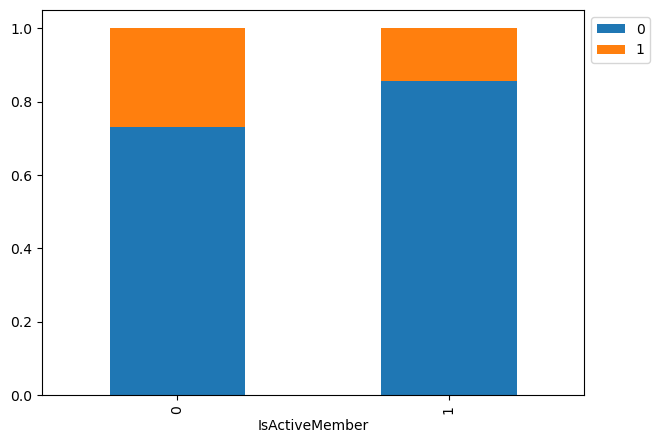

In [28]:
stacked_barplot(df, 'IsActiveMember', "Exited")

- Inactive members leaves the bank the most compared to actives.

Exited       0     1    All
Complain                   
All       7962  2038  10000
1           10  2034   2044
0         7952     4   7956
------------------------------------------------------------------------------------------------------------------------


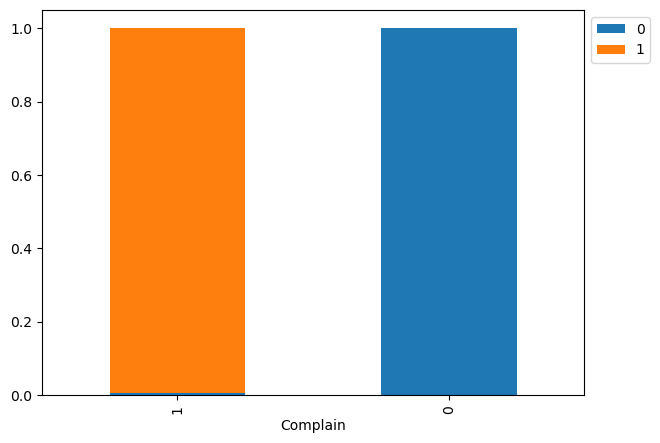

In [29]:
stacked_barplot(df, 'Complain', "Exited")

- A big majority of those exited filed a complaint to the bank.
- Also vice versa, a big majority of those who didn't exit didn't file a complaint.
- We further look at the exception.

In [30]:
df.loc[(df['Exited'] == 'Yes') & (df['Complain'] == 'No')]

Empty DataFrame
Columns: [RowNumber, CustomerId, Surname, CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited, Complain, Satisfaction Score, Card Type, Point Earned]
Index: []

- These are actual customers leaving without saying anything which happens.

In [31]:
df.loc[(df['Exited'] == 'No') & (df['Complain'] == 'Yes')]

Empty DataFrame
Columns: [RowNumber, CustomerId, Surname, CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited, Complain, Satisfaction Score, Card Type, Point Earned]
Index: []

- These are customers who stayed and preferred staying.

**Verdict:** 

- In the former case, the data are usually very valuable information on predicting customer churn.
- In the latter case, the data are valuable to design customer retention program.
- Due to the lack of these data, we will choose to omit this column since it won't give much value for the analysis.

Exited        0     1    All
Card Type                   
All        7962  2038  10000
DIAMOND    1961   546   2507
PLATINUM   1987   508   2495
SILVER     1994   502   2496
GOLD       2020   482   2502
------------------------------------------------------------------------------------------------------------------------


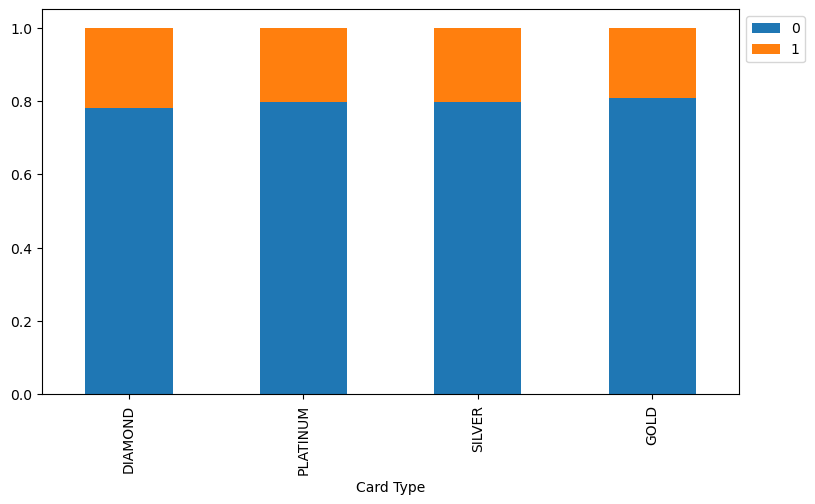

In [32]:
stacked_barplot(df, 'Card Type', "Exited")

- No obvious pattern in regards to card type customer owns.

### Data Preprocessing

- We dropping `RowNumber`, `CustomerId`, `Surname` since it doesn't provide us info.

In [33]:
df.drop(['RowNumber','CustomerId','Surname'], axis=1, inplace=True)

- As discussed before, we will drop `Complain` column due to the lack of valueble data.

In [34]:
df.drop(['Complain'], axis=1, inplace=True)

- Encode all the categorical variables

In [35]:
# # gender = {"Male": 0, "Female": 1}
# # geography = {"Germany": 0, "France": 1, "Spain": 2}
# # cardtype = {"DIAMOND": 0, "GOLD": 1, "SILVER": 2, "PLATINUM": 3}
hascrcard = {0: "No", 1: "Yes"}
isactivemember = {0: "No", 1: "Yes"}
exited = {0: "No", 1: "Yes"}

# # df["Gender"] = df["Gender"].map(gender)
# # df["Geography"] = df["Geography"].map(geography)
# # df["Card Type"] = df["Card Type"].map(cardtype)
df["HasCrCard"] = df["HasCrCard"].map(hascrcard)
df["IsActiveMember"] = df["IsActiveMember"].map(isactivemember)
df["Exited"] = df["Exited"].map(exited)

In [36]:
df.head()

CreditScore Geography  Gender  Age  Tenure   Balance  NumOfProducts  \
0          619    France  Female   42       2      0.00              1   
1          608     Spain  Female   41       1  83807.86              1   
2          502    France  Female   42       8 159660.80              3   
3          699    France  Female   39       1      0.00              2   
4          850     Spain  Female   43       2 125510.82              1   

  HasCrCard IsActiveMember  EstimatedSalary Exited  Satisfaction Score  \
0       Yes            Yes        101348.88    Yes                   2   
1        No            Yes        112542.58     No                   3   
2       Yes             No        113931.57    Yes                   3   
3        No             No         93826.63     No                   5   
4       Yes            Yes         79084.10     No                   5   

  Card Type  Point Earned  
0   DIAMOND           464  
1   DIAMOND           456  
2   DIAMOND           377  
3      GOLD           350  
4      GOLD           425

### Data Preparation for Modelling

In [37]:
X = df.drop(['Exited'], axis=1)
y = df['Exited'].apply(lambda x: 1 if x=='Yes' else 0)

X = sm.add_constant(X)

In [38]:
y.value_counts()

Exited
0    7962
1    2038
Name: count, dtype: int64

In [39]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(6000, 14) (2000, 14) (2000, 14)


In [40]:
print("Shape of Training set : ", X_train.shape)
print("Shape of Validation set : ", X_val.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in validation set:")
print(y_val.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (6000, 14)
Shape of Validation set :  (2000, 14)
Shape of test set :  (2000, 14)
Percentage of classes in training set:
Exited
0   0.80
1   0.20
Name: proportion, dtype: float64
Percentage of classes in validation set:
Exited
0   0.80
1   0.20
Name: proportion, dtype: float64
Percentage of classes in test set:
Exited
0   0.80
1   0.20
Name: proportion, dtype: float64


### Model Building

#### Model evaluation criterion:

**Model can make wrong predictions as:**
- Predicting a customer exits but customer didn't exit (FP).
- Predicting a customer doesn't exit but customer exits (FN).

**Which case is more important?**
- Predicting TP increases income and prolonged customer lifetime.
- Predicting FP will cost the bank incur incentive to someone who wouldn't churn.
- Predicting FN will lose potential customer lifetime value.

**How to reduce the losses?**

We want to minimize both FP and FN since both matters. In bank, expected profit is optimized. However for simplicity, we look for maximizing *F1 score*.

#### Logit model

In [41]:
# Creating dummy variables
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
print(X_train.shape, X_val.shape, X_test.shape)

(6000, 17) (2000, 17) (2000, 17)


In [42]:
X_train1 = X_train.astype(float)
X_val1 = X_val.astype(float)
X_test1 = X_test.astype(float)

In [43]:
logit = sm.Logit(y_train, X_train1)
lg = logit.fit(disp=False)  # setting disp=False will remove the information on number of iterations

##### **Checking multicollinearity**

In [44]:
checking_vif(X_train1)

feature   VIF
0                const 97.87
1          CreditScore  1.00
2                  Age  1.01
3               Tenure  1.00
4              Balance  1.33
5        NumOfProducts  1.12
6      EstimatedSalary  1.00
7   Satisfaction Score  1.00
8         Point Earned  1.00
9    Geography_Germany  1.35
10     Geography_Spain  1.13
11         Gender_Male  1.01
12       HasCrCard_Yes  1.00
13  IsActiveMember_Yes  1.01
14      Card Type_GOLD  1.52
15  Card Type_PLATINUM  1.51
16    Card Type_SILVER  1.51

- no signs of multicollinearity

In [45]:
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:                 Exited   No. Observations:                 6000
Model:                          Logit   Df Residuals:                     5983
Method:                           MLE   Df Model:                           16
Date:                Mon, 23 Feb 2026   Pseudo R-squ.:                  0.1514
Time:                        17:21:17   Log-Likelihood:                -2573.4
converged:                       True   LL-Null:                       -3032.7
Covariance Type:            nonrobust   LLR p-value:                2.999e-185
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.1382      0.342     -9.166      0.000      -3.809      -2.467
CreditScore           -0.0008      0.000     -2.142      0.032      -0.002   -6.64e-05
Age                 

##### **Remove high p-values**

In [46]:
# initial list of columns
cols = X_train1.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    X_train_aux = X_train1[cols]

    # fitting the model
    model = sm.Logit(y_train, X_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'CreditScore', 'Age', 'Balance', 'Geography_Germany', 'Gender_Male', 'IsActiveMember_Yes']


In [47]:
X_train2 = X_train1[selected_features]

In [48]:
logit2 = sm.Logit(y_train, X_train2)
lg2 = logit2.fit(disp=False)

print(lg2.summary())

                           Logit Regression Results                           
Dep. Variable:                 Exited   No. Observations:                 6000
Model:                          Logit   Df Residuals:                     5993
Method:                           MLE   Df Model:                            6
Date:                Mon, 23 Feb 2026   Pseudo R-squ.:                  0.1490
Time:                        17:21:18   Log-Likelihood:                -2580.7
converged:                       True   LL-Null:                       -3032.7
Covariance Type:            nonrobust   LLR p-value:                5.137e-192
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.5008      0.279    -12.562      0.000      -4.047      -2.955
CreditScore           -0.0008      0.000     -2.123      0.034      -0.001   -5.95e-05
Age                 

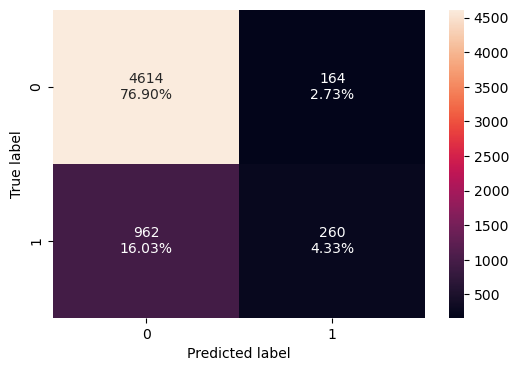

In [49]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_train2, y_train)

In [50]:
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lg2, X_train2, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


Accuracy  Recall  Precision   F1
0      0.81    0.21       0.61 0.32

##### **Validation performance**

In [51]:
X_val2 = X_val1[list(X_train2.columns)]

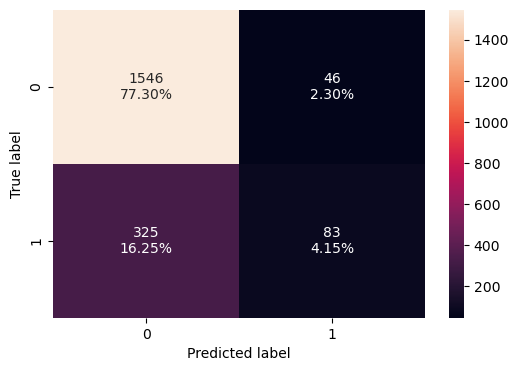

In [52]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_val2, y_val)

In [53]:
log_reg_model_val_perf = model_performance_classification_statsmodels(
    lg2, X_val2, y_val
)

print("Test performance:")
log_reg_model_val_perf

Test performance:


Accuracy  Recall  Precision   F1
0      0.81    0.20       0.64 0.31

Observations:
- The model has *F1 score* of 0.32 and 0.31 on training and validation sets respectively.
- No signs of overfitting.
- We proceed to improve the model performance.

##### **ROC Curve and ROC-AUC**

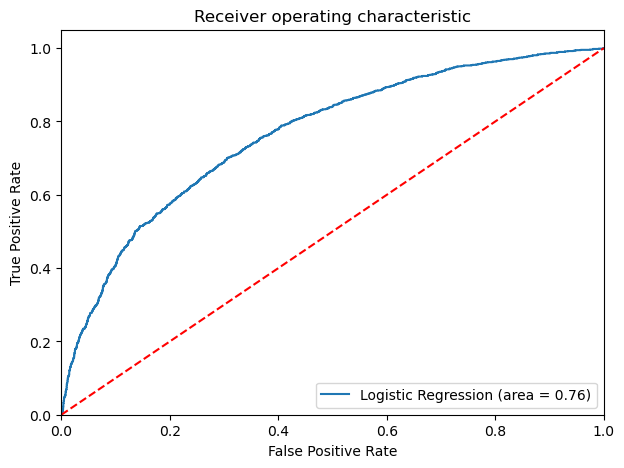

In [54]:
logit_roc_auc_train = roc_auc_score(y_train, lg2.predict(X_train2))
fpr, tpr, thresholds = roc_curve(y_train, lg2.predict(X_train2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [55]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg2.predict(X_train2))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.1973876100323239


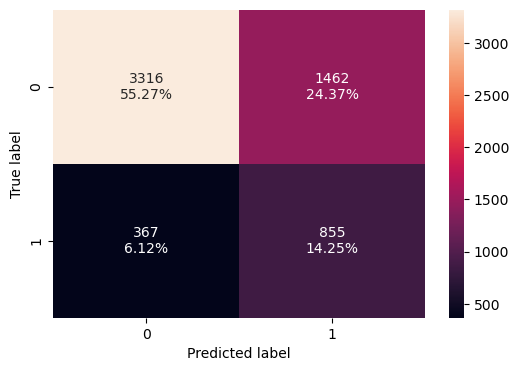

In [56]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg2, X_train2, y_train, threshold=optimal_threshold_auc_roc
)

In [57]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg2, X_train2, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


Accuracy  Recall  Precision   F1
0      0.70    0.70       0.37 0.48

Observations:
- F1 score increased to 0.48.
- Recall is significantly better while precision decreased.

**Check performance on validation set**

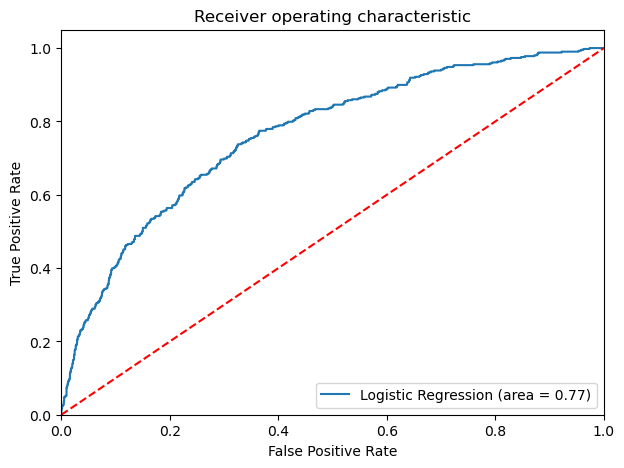

In [58]:
logit_roc_auc_train = roc_auc_score(y_val, lg2.predict(X_val2))
fpr, tpr, thresholds = roc_curve(y_val, lg2.predict(X_val2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

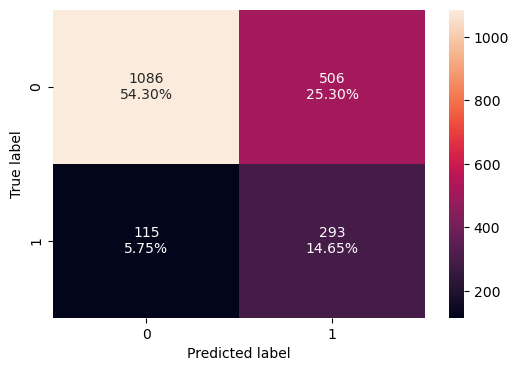

In [59]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg2, X_val2, y_val, threshold=optimal_threshold_auc_roc
)

In [60]:
# checking model performance for this model
log_reg_model_val_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg2, X_val2, y_val, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


Accuracy  Recall  Precision   F1
0      0.70    0.70       0.37 0.48

- No difference between training and validation performance. The model has improved significantly.
- Further continue another method.

##### **Precision-Recall Curve**

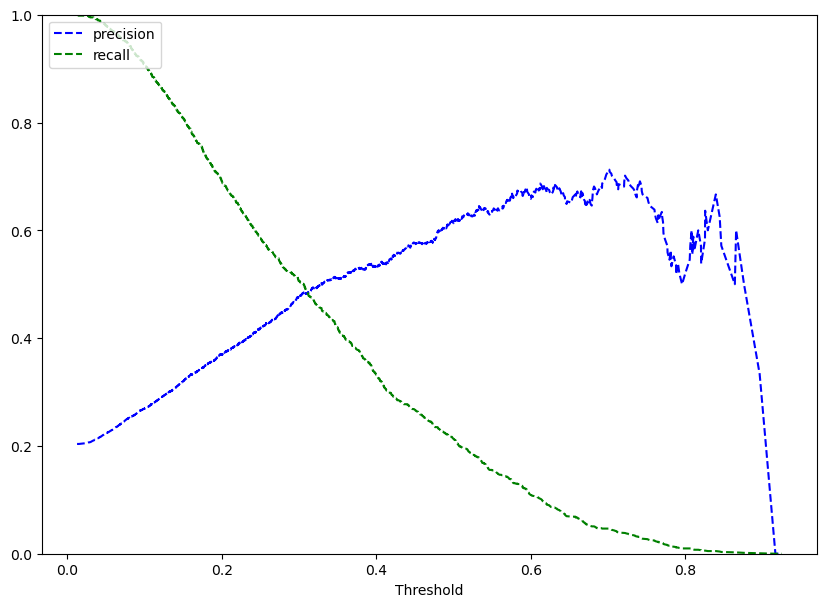

In [61]:
y_scores = lg2.predict(X_train2)
prec, rec, tre = precision_recall_curve(y_train, y_scores)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])
    
def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

In [62]:
# searching the intersection point of recall and precision
print(intersection(rec.tolist(),prec.tolist()))
intersected = intersection(rec.tolist(),prec.tolist())

[1.0, 1.0, 1.0, 1.0, 0.6923076923076923, 0.6595744680851063, 0.6595744680851063, 0.6595744680851063, 0.6595744680851063, 0.6595744680851063, 0.6595744680851063, 0.6595744680851063, 0.6595744680851063, 0.6595744680851063, 0.6595744680851063, 0.6595744680851063, 0.6595744680851063, 0.6595744680851063, 0.6595744680851063, 0.6538461538461539, 0.6382978723404256, 0.6153846153846154, 0.6153846153846154, 0.6153846153846154, 0.6153846153846154, 0.574468085106383, 0.574468085106383, 0.574468085106383, 0.5597381342062193, 0.5597381342062193, 0.5597381342062193, 0.5597381342062193, 0.5597381342062193, 0.5597381342062193, 0.5597381342062193, 0.5597381342062193, 0.5384615384615384, 0.5384615384615384, 0.5384615384615384, 0.5384615384615384, 0.5384615384615384, 0.5384615384615384, 0.5384615384615384, 0.5106382978723404, 0.5106382978723404, 0.5106382978723404, 0.5, 0.5, 0.5, 0.483633387888707, 0.483633387888707, 0.483633387888707, 0.483633387888707, 0.483633387888707, 0.483633387888707, 0.48363338788

In [63]:
# extract the threshold 
intersect = pd.DataFrame({'prec': prec[:-1],
                          'rec': rec[:-1],
                          'tre': tre})

intersect[intersect['prec'] == 0.483633387888707]

prec  rec  tre
4748  0.48 0.48 0.31

- Somewhere around threshold of 0.31

In [64]:
# setting the threshold
optimal_threshold_curve = 0.31

**Check model performance in both training and validation set**

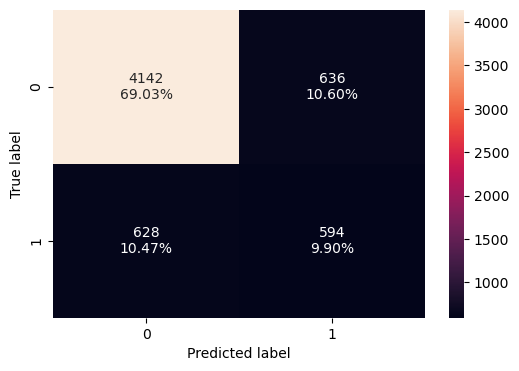

In [65]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_train2, y_train, threshold=optimal_threshold_curve)

In [66]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg2, X_train2, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


Accuracy  Recall  Precision   F1
0      0.79    0.49       0.48 0.48

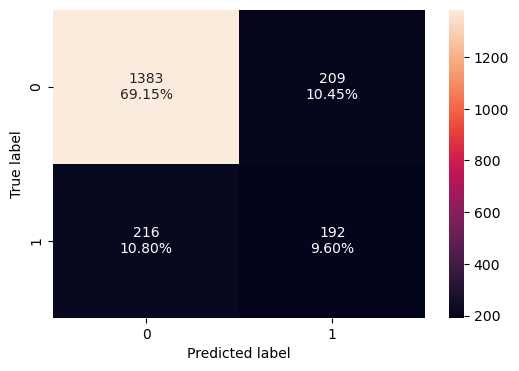

In [67]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_val2, y_val, threshold=optimal_threshold_curve)

In [68]:
log_reg_model_val_perf_threshold_curve = model_performance_classification_statsmodels(
    lg2, X_val2, y_val, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_val_perf_threshold_curve

Test performance:


Accuracy  Recall  Precision   F1
0      0.79    0.47       0.48 0.47

In [69]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.20 Threshold",
    "Logistic Regression-0.31 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Regression-default Threshold (0.5)  \
Accuracy                                          0.81   
Recall                                            0.21   
Precision                                         0.61   
F1                                                0.32   

           Logistic Regression-0.20 Threshold  \
Accuracy                                 0.70   
Recall                                   0.70   
Precision                                0.37   
F1                                       0.48   

           Logistic Regression-0.31 Threshold  
Accuracy                                 0.79  
Recall                                   0.49  
Precision                                0.48  
F1                                       0.48

- The logit with 0.20 threshold gives overall best result, we will use the model on to our test set and derive insights and recommendation.

##### **Test set performance and prediction**

In [70]:
X_test2 = X_test1[list(X_train2.columns)]

In [71]:
threshold=optimal_threshold_auc_roc
print(threshold)

0.1973876100323239


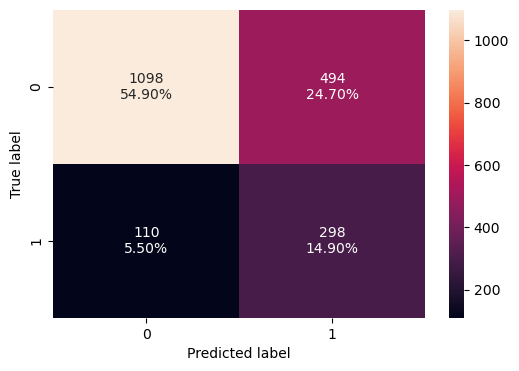

In [72]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_test2, y_test, threshold=optimal_threshold_auc_roc)

In [73]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg2, X_test2, y_test, threshold=optimal_threshold_auc_roc
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


Accuracy  Recall  Precision   F1
0      0.70    0.73       0.38 0.50

- Our test performance did better than our training and validation set.

In banking terms, assume value saved is \\$1000 and cost offer is \\$100:

$$ \textrm{Expected Profit} = (110 \times \\$1000) - (494 \times \\$100)
\\ = \\$60,600 $$

- Precision controls campaign cost efficiency, while recall controls churn capture rate. The optimal balance depends on customer lifetime value versus retention.

In [74]:
print(lg2.summary())

                           Logit Regression Results                           
Dep. Variable:                 Exited   No. Observations:                 6000
Model:                          Logit   Df Residuals:                     5993
Method:                           MLE   Df Model:                            6
Date:                Mon, 23 Feb 2026   Pseudo R-squ.:                  0.1490
Time:                        17:21:20   Log-Likelihood:                -2580.7
converged:                       True   LL-Null:                       -3032.7
Covariance Type:            nonrobust   LLR p-value:                5.137e-192
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.5008      0.279    -12.562      0.000      -4.047      -2.955
CreditScore           -0.0008      0.000     -2.123      0.034      -0.001   -5.95e-05
Age                 

**Converting coefficients to odds**

In [75]:
# converting coefficients to odds
odds = np.exp(lg2.params)

# finding the percentage change
perc_change_odds = (np.exp(lg2.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train2.columns).T

const  CreditScore  Age  Balance  Geography_Germany  Gender_Male  \
Odds          0.03         1.00 1.08     1.00               2.09         0.63   
Change_odd% -96.98        -0.08 7.54     0.00             109.43       -36.52   

             IsActiveMember_Yes  
Odds                       0.34  
Change_odd%              -66.06

# Business Insights and Recommendations

Observations and insights:
- `Age`, `Balance`, and `Geography_Germany` is positive; an increase in these will lead to an increase in chances of a customer churning.
- `CreditScore`, `Gender_Male`, `IsActiveMember_Yes` is negative; an increase in these will lead to a decreased in chances of a customer churning.

- `CreditScore`: Holding all other features constant a unit change in credit score will decrease the odd of a customer churning by 1.0 times or a 0.08% decrease in odds.
- `Age`: Holding all other features constant a unit change in age will increase the odds of a customer churning by 1.08 times or an increase in 7.54% odds.
- `Balance`: Holding all other features constant a unit change in balance will increase the odds of churning by 1.0 times or a very small % increase in odds.
- `Geography_Germany`: The odds of a german customer will churn is 2.09 times more than other customers or 109.43% more odds than other country customer.
- `Gender_Male`: The odds of a male customer churn is 0.63 times less than female customer or 36.52% fewer odds than female customer.
- `IsActiveMember_Yes`: The odds of a customer who is active will churn is 0.34 times less than customer who is not active or 66.06% fewer odds than a customer who is not active.

Recommendation:
- We have omitted `Complain` column throughout this analysis due to the lact of valuable information, namely those who churn and didn't complain, and those who didn't churn but filed a complain.
- Collect more data regarding webpages to track customers onsite traffic metrics.
- More demographics data such as product favourites.